![IMAGEN VENTAS ONLINE ESTADOS UNIDOS](./data/imagen-ventas-online-en-estados-unidos.jpg)

# **EDA - ANÁLISIS EXPLORATORIO DE DATOS DE VENTAS ONLINE DE UNA EMPRESA EN ESTADOS UNIDOS**

## 1. INTRODUCCIÓN

El presente EDA contiene un análisis del comportamiento de las ventas online de una empresa radicada en Estados Unidos. 

El conjunto de datos principal contiene información sobre las ventas producidas por la empresa en el plazo de 12 meses, desde Octubre 2020 a Septiembre 2021.

Asimismo, se encuentra detallado el valor de las ventas, las fechas en las que se realizaron las mismas, las categorías de productos vendidos, edad de los clientes, el Estado donde residen los mismos, etc. 

Complementariamente, se utiliza un conjunto de datos secundario que contiene el ingreso promedio familiar por Estado, con el objeto de observar si hay relación entre aquellos Estados que generan más ingresos a la empresa y el poder adquisitivo de los clientes de los mismos. 

## 2. OBJETIVO

El objetivo de este EDA es orientado a fines comerciales, en el sentido de averiguar por ejemplo, cuáles son las categorías de productos que mayores ingresos generan a la empresa, para ampliar quizás el stock de los mismos o continuar en la misma directiva; cuáles son los meses donde se producen más ventas, con el fin de contar con la mercadería suficiente en los meses más fuertes y asimismo, en cuáles menos, con el propósito por ejemplo, de realizar promociones y descuentos.

En relación al marketing, se podría averiguar cuáles son las edades de los clientes que menos consumen para intentar atraerlos, cuáles son los Estados donde menos ventas se producen con el fin de aplicar ténicas para lograr un aumento en las mismas. 

## 3. HIPÓTESIS

A continuación detallo las hipótesis principales de mi EDA, las cuales se confirmarán o no, con los análisis estadísticos en cada punto.

**1.** ¿Existen diferencias significativas en las ventas según las categorías de productos? <br>
**2.** ¿Hay una relación positiva entre la cantidad de ventas y los ingresos percibidos por categorías? <br>
**3.** ¿Cuál es la distribución de las ventas por meses? ¿Hay algún mes con mayor cantidad de ventas?<br>
**4.** ¿Cuáles son las edades de los consumidores que más ingresos generan?<br>
**5.** ¿Existen diferencias según la categoría de productos elegidas en relación a la edad de los clientes?<br>
**6**. ¿Cuáles son los Estados en los que se producen mayores ingresos por ventas online?<br>
**7.** ¿Hay relación entre los Estados donde más ventas se producen y aquellos donde el poder adquisitivo de los clientes es mayor?

## 4. IMPORTACIÓN DE LIBRERÍAS

Importo las librerías que serán usadas en el presente notebook.

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd

## 5. IMPORTACIÓN DE DATASETS

Respecto a los Datasets, usaré **2** archivos *.csv*. 
- ***Online_Sales_USA.csv*** = Es el DataFrame principal.
- ***Cost_Of_Living_USA.csv*** = Es el DataFrame secundario, de donde se extraerá solo una variable para analizar con el principal, y será utilizado en el Punto 8.4 de este Notebook. 

In [2]:
df_original = pd.read_csv('./data/1.raw/Online_Sales_USA.csv')

C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\3037454922.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('./data/1.raw/Online_Sales_USA.csv')


In [196]:
df_costos = pd.read_csv('./data/1.raw/Cost_Of_Living_USA.csv')

## 6. ANÁLISIS GENERAL DE DATOS

Se realiza un `.head()` para obtener una visión general respecto a las primeras filas del DataFrame y las etiquetas de las columnas. 

In [6]:
df_original.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


Con `.info()` obtenemos información general del conjunto de datos, como por ejemplo, cantidad de columnas y filas, el tipo de dato según los valores de cada columna, la cantidad de datos no nulos, etc. 

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

Realizo un `.describe()` para obtener un breve análisis estadístico de las variables númericas: 

In [8]:
df_original.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


Análisis estadístico de variables no numéricas:

In [9]:
df_original.describe(include=object)

,order_id,order_date,status,sku,category,payment_method,bi_st,month,Name Prefix,First Name,...,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Region,User Name
count,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,...,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392
unique,201716,365,13,47932,15,13,3,12,7,5161,...,64246,11647,64146,64248,15892,2551,15892,51,4,64006
top,100476608,2020-12-20,canceled,MATSAM59DB75ADB2F80,Mobiles & Tablets,cod,Gross,Dec-2020,Mr.,Joel,...,joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,217-861-7640,Dekalb,Jefferson,Dekalb,TX,South,jugonzalez
freq,43,13678,112166,3775,61761,102916,112333,82528,103506,2895,...,2524,2536,2524,2524,2525,3510,2525,17510,103482,2524


Seguidamente obtenemos la dimensión del DataFrame con `.shape()`, lo cual devuelve la cantidad de filas y columnas.

In [11]:
df_original.shape

(286392, 36)

Realizo un `isnull()` + `sum()` para verificar si tengo datos nulos, y la cantidad de los mismos. 

In [12]:
df_original.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

Además, se verifica si hay entradas ducplicadas:

In [13]:
df_original.duplicated().sum()

0

Y por último, realizo un `.nunique()` para observar la cantidad de valores únicos que existen por columna. 

In [14]:
df_original.nunique()

order_id            201716
order_date             365
status                  13
item_id             286392
sku                  47932
qty_ordered             72
price                 7561
value                10814
discount_amount      14577
total                24451
category                15
payment_method          13
bi_st                    3
cust_id              64248
year                     2
month                   12
ref_num              62065
Name Prefix              7
First Name            5161
Middle Initial          26
Last Name            18208
Gender                   2
age                     58
full_name            64212
E Mail               64246
Customer Since       11647
SSN                  64146
Phone No.            64248
Place Name           15892
County                2551
City                 15892
State                   51
Zip                  33773
Region                   4
User Name            64006
Discount_Percent     17133
dtype: int64

## 7. LIMPIEZA DE DATOS 

Procederé a realizar la limpieza del conjunto de datos, como por ejemplo, eliminar columnas que son irrelevantes para el análisis, modificar etiquetas de columnas para que unificar todo al idioma español, convertir la columna donde constan las fechas de pedidos en el índice y demás.

### 7.1. LIMPIEZA DATAFRAME `df_ventas_online`

#### 7.1.1. COPIA DEL CONJUNTO DE DATOS ANTES DE LA LIMPIEZA

Realizo por cuestiones de seguridad una copia de mi archivo de ventas antes de la limpieza.

In [4]:
df_original_copia = df_original.copy()

In [75]:
df_original_copia.to_csv('./data/1.raw/copia_Online_Sales_USA.csv')

#### 7.1.2. ELIMINACIÓN DE COLUMNAS

Luego de un análisis en relación a mis hipótesis y al conjunto datos, procedo a eliminar las columnas que no son relevantes para realizar el EDA. <br>
La razón por la cual se elimina cada columna se encuentra detallada en la [Memoria](MEMORIA.ipynb) del presente EDA. 

In [6]:
columnas_a_eliminar = ['order_id', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'discount_amount', 'total', 'payment_method', 'bi_st', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'full_name', 'E Mail', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'Zip', 'year', 'month', 'User Name', 'Gender', 'Customer Since',
       'Discount_Percent']

len(columnas_a_eliminar) # Corroboro que sea la cantidad exacta de columnas a eliminar

28

In [7]:
df_ventas_online = df_original.drop(columns=columnas_a_eliminar)

Por último, verifico que hayan quedado las columnas que son importantes para mi EDA.

In [8]:
df_ventas_online.columns

Index(['order_date', 'value', 'category', 'cust_id', 'age', 'City', 'State',
       'Region'],
      dtype='object')

#### 7.1.3. TRADUCCIONES

Realizaré la traducción de las etiquetas de las columnas, de los valores contenidos en la variable 'categoria'y 'region', todo ello para que haya un idioma uniforme en todo el análisis.

In [9]:
# A. TRADUCCIÓN COLUMNAS
traduccion_columnas = {
    'order_date': 'fecha_de_pedido',
    'value': 'valor',
    'category': 'categoria',
    'cust_id': 'ID_cliente',
    'age': 'edad',
    'City': 'ciudad',
    'State': 'estado',
    'Region': 'region'
}
    
df_ventas_online = df_ventas_online.rename(columns= traduccion_columnas)

In [10]:
# B. TRADUCCIÓN CATEGORÍAS
traduccion_categorias = {
    "Men's Fashion": 'Moda Hombres',
    'Mobiles & Tablets': 'Móviles y Tablets',
    'Computing': 'Computadoras',
    'Appliances': 'Electrodomésticos',
    'Home & Living': 'Hogar y Decoración',
    "Women's Fashion": 'Moda Mujeres',
    'Health & Sports': 'Salud y Deportes',
    'Beauty & Grooming': 'Belleza y Cuidado Personal',
    'Superstore': 'Supermercado',
    'Others': 'Otros',
    'Entertainment': 'Entretenimiento',
    'Soghaat': 'Artículos de Regalo',
    'Kids & Baby': 'Niños y Bebés',
    'Books': 'Libros',
    'School & Education': 'Escuela y Educación'
}

df_ventas_online['categoria'] = df_ventas_online['categoria'].replace(traduccion_categorias)

In [11]:
# C. TRADUCCIÓN REGIONES
traduccion_regiones = {
    'South': 'Sur',
    'Midwest': 'Medio Oeste',
    'West': 'Oeste',
    'Northeast': 'Noreste'
}

df_ventas_online['region'] = df_ventas_online['region'].replace(traduccion_regiones)

 #### 7.1.4. CONVERSIÓN DE COLUMNA A ÍNDICE EN FORMATO DATETIME

Para poder analizar datos relacionados con la variable que contiene las fechas, convertiré la columna 'fecha_de_pedido' en índice, y a su vez en formato datetime.

In [12]:
df_ventas_online = df_ventas_online.set_index('fecha_de_pedido')

In [13]:
df_ventas_online.index = pd.to_datetime(df_ventas_online.index)

#### 7.1.5. ACTUALIZACIÓN CONJUNTO DE DATOS

Luego de realizar la limpieza, guardo en un nuevo archivo *csv* lo que será el DataFrame principal del EDA.

In [14]:
df_ventas_online.to_csv('./data/2.processed/df_ventas_online.csv')

### 7.2. LIMPIEZA DATAFRAME `df_costos`

#### 7.2.1. DETECTAR SI HAY DATOS NULOS Y RELLENAR LOS MISMOS

In [197]:
df_costos.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

Se observa que en la única columna que hay datos nulos, es la que utilizaré, por lo que deberé rellenar esos nulos. <br>
Seguidamente, realizo una máscara booleana para ver en qué filas se encuentran los nulos. 

In [ ]:
df_costos[df_costos['median_family_income'].isnull()]

Los datos NaN provienen del estado 'MO'. <br>
Procederé a rellenarlos con la media de los ingresos que percibidos en dicho estado, ya que, en relación a 'MO' no hay solo un ingreso promedio por familia, sino varios. 

In [200]:
promedio_mo = df_costos.loc[df_costos['state'] == 'MO', 'median_family_income'].mean()
df_costos.fillna(promedio_mo, inplace=True)

In [199]:
promedio_mo = df_costos.loc[df_costos['state'] == 'MO', 'median_family_income'].mean()

In [201]:
df_costos.isnull().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

#### 7.2.2. ELIMINACIÓN COLUMNAS INNECESARIAS

Modifico mi DataFrame conservando unicamente las columnas que serán utilizadas para el análisis.

In [202]:
columnas_a_borrar = [
    col for col in df_costos.columns
    if col not in ['state', 'median_family_income']
]
df_costos.drop(columns=columnas_a_borrar, inplace=True)

#### 7.2.3. TRADUCCIÓN COLUMNAS 

Al igual que hice anteriormente con el DataFrame de ventas online, traduzco las columnas para lograr una uniformidad en el idioma utilizado en el presente EDA. 

In [203]:
traduccion_columnas2 = {
    'state': 'estado',
    'median_family_income' : 'ingreso_familiar_promedio'
}
    
df_costos = df_costos.rename(columns= traduccion_columnas2)

#### 7.2.4. CREACIÓN ARCHIVO CSV CON DATAFRAME LIMPIO

In [205]:
df_costos.to_csv('./data/2.processed/df_costos_estados.csv')

## 8. ANÁLISIS EXPLORATORIO DE DATOS

In [15]:
df_ventas_online = pd.read_csv('./data/2.processed/df_ventas_online.csv')

In [259]:
df_ventas_online.head()

,valor,categoria,ID_cliente,edad,ciudad,estado,region
fecha_de_pedido,,,,,,,
2020-10-01,1798.0,Moda Hombres,60124.0,43.0,Vinson,OK,Sur
2020-10-01,190.0,Moda Hombres,60124.0,43.0,Vinson,OK,Sur
2020-10-01,1199.2,Moda Hombres,60124.0,43.0,Vinson,OK,Sur
2020-10-01,639.2,Moda Hombres,60124.0,43.0,Vinson,OK,Sur
2020-11-13,99.9,Moda Hombres,60124.0,43.0,Vinson,OK,Sur


**DESCRIPCIÓN COLUMNAS**

| NOMBRE COLUMNA | DESCRIPCIÓN | TIPO DE VARIABLE |
|----------|----------|----------|
|fecha_de_pedido|Fecha en la que se produjo la venta|Índice - Datetime|
|valor|Valor de cada venta|Cuantitativa, Continua|
|categoria|Categoría de productos|Categórica, Nominal|
|ID_cliente|Identificación del cliente|Categórica, nominal|
|edad|Edad de los consumidores|Cuantitativa, Discreta|
|ciudad|Ciudad desde donde se realizan los pedidos|Categórica, Nominal|
|estado|Estado desde donde se realizan los pedidos|Categórica, Nominal|
|region|Ciudad desde donde se realizan los pedidos|Categórica, Nominal|


### 8.1 ANÁLISIS CATEGORÍAS


#### 8.1.1 DISTRIBUCIÓN DE VENTAS POR CATEGORÍAS DE PRODUCTOS

> 1. CANTIDAD DE CATEOGRÍAS Y GRÁFICO `countplot` PARA OBSERVAR DISTRIBUCIÓN

Primero quiero averiguar cuántos valores únicos existen en la variable 'categoria' y cuáles son. Seguidamente, realizo un gráfico de barras con `countplot` de la librería 'Seaborn', para observar como se distribuyen las ventas por las 15 categorías existentes. 

In [16]:
df_ventas_online['categoria'].nunique()

15

In [17]:
df_ventas_online['categoria'].unique()

array(['Moda Hombres', 'Móviles y Tablets', 'Computadoras',
       'Electrodomésticos', 'Hogar y Decoración', 'Moda Mujeres',
       'Salud y Deportes', 'Belleza y Cuidado Personal', 'Supermercado',
       'Otros', 'Entretenimiento', 'Artículos de Regalo', 'Niños y Bebés',
       'Libros', 'Escuela y Educación'], dtype=object)

C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\1795987958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='categoria', data=df_ventas_online, order=df_ventas_online['categoria'].value_counts().index, palette=palette)


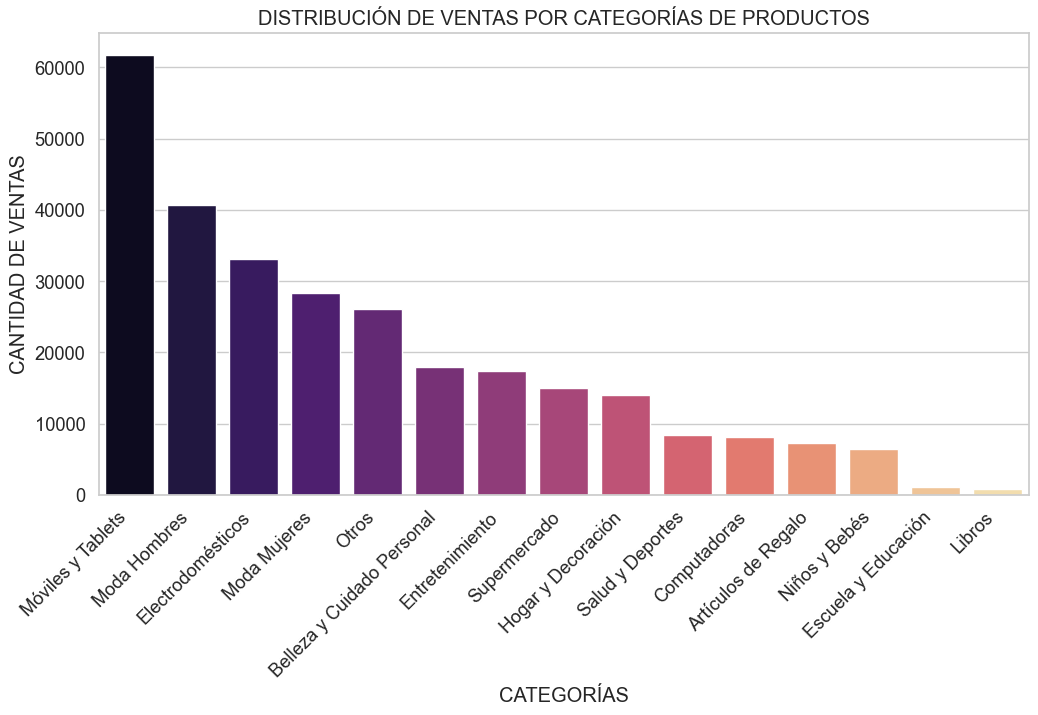

In [269]:
palette = sns.color_palette('magma', n_colors=15)

plt.figure(figsize=(12, 6))
sns.countplot(x='categoria', data=df_ventas_online, order=df_ventas_online['categoria'].value_counts().index, palette=palette)
plt.title('DISTRIBUCIÓN DE VENTAS POR CATEGORÍAS DE PRODUCTOS')
plt.xlabel('CATEGORÍAS')
plt.ylabel('CANTIDAD DE VENTAS')
plt.xticks(rotation=45, ha='right')

plt.savefig('./utils/categorias_countplot.png')

plt.show();

> 2. NUEVO DATAFRAME AGRUPADO POR CATGORÍAS Y NÚMEROS DE VENTAS 

A continuación, agrupo las categorías en un DataFrame y realizo un conteo de ventas sobre las mismas, para obtener detalladamente los números de ventas por cada categoría. 

In [19]:
df_agrupado_categorias = df_ventas_online.groupby('categoria')['valor'].count().reset_index(name='numero_de_ventas')
df_agrupado_categorias.sort_values(by='numero_de_ventas', ascending=False).reset_index().drop(columns='index')

,categoria,numero_de_ventas
0,Móviles y Tablets,61761
1,Moda Hombres,40713
2,Electrodomésticos,33034
3,Moda Mujeres,28334
4,Otros,26108
5,Belleza y Cuidado Personal,17899
6,Entretenimiento,17352
7,Supermercado,15024
8,Hogar y Decoración,13990
9,Salud y Deportes,8421


> #### ***HIGHLIGHTS SOBRE CATEGORÍAS:***

**Categorías con mayor cantidad de ventas**: 
1. Móviles y Tablets = 61761 ventas.
2. Moda Hombres = 40713 ventas.
3. Electrodomésticos = 33034 ventas.

**Categorías con menor cantidad de ventas**: 
- Niños y Bebés	= 6492
- Escuela y Educación = 1090
- Libros = 814

> 3. HISTOGRAMA CON `histplot` PARA OBSERVAR LA DISTRIBUCIÓN DE LAS VENTAS POR CATEGORÍAS.

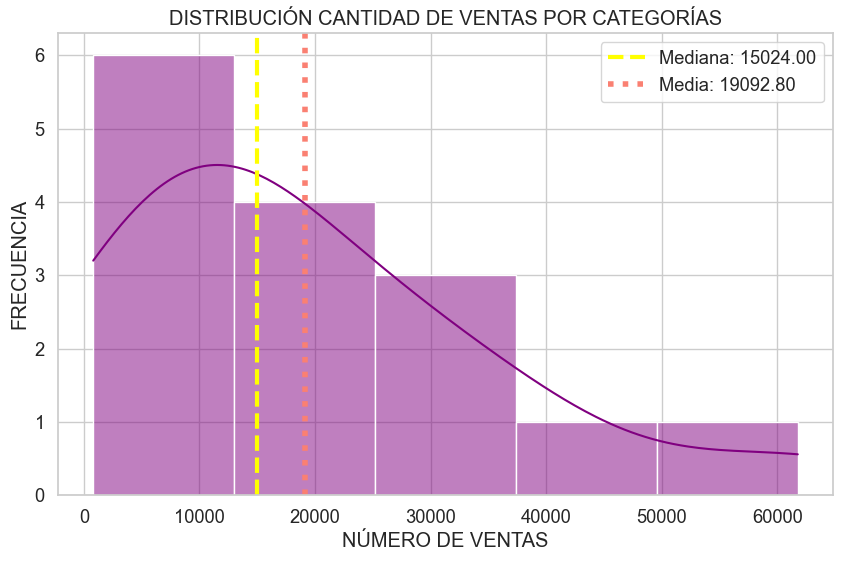

In [270]:
plt.figure(figsize=(10, 6))
sns.histplot(df_agrupado_categorias['numero_de_ventas'], bins=5, kde=True, color='purple')

# Cálculo de la mediana y la media
mediana_ventas = df_agrupado_categorias['numero_de_ventas'].median()
media_ventas = df_agrupado_categorias['numero_de_ventas'].mean()

# Líneas verticales para la mediana y la media
plt.axvline(mediana_ventas, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_ventas:.2f}')
plt.axvline(media_ventas, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_ventas:.2f}')

# Título y etiquetas
plt.title('DISTRIBUCIÓN CANTIDAD DE VENTAS POR CATEGORÍAS')
plt.xlabel('NÚMERO DE VENTAS')
plt.ylabel('FRECUENCIA')

plt.legend()

plt.savefig('./utils/categorias_histograma.png') 

plt.show()

**CONCLUSIÓN:**
Se puede observar en el histograma una **distribución asimétrica positiva** de las ventas por categorías. <br>
Claramente hay algunos valores extremadamente altos que desvían la media hacia la derecha de la mediana, y conforme se pudo ver en el gráfico ut supra, contamos con la presencia de un 'outlier' respecto al resto de las categorías, el cual es, la elevada cantidad de ventas de 'Móviles y Tablets'.

In [272]:
print('- La MEDIANA de ventas según categoría es de:', mediana_ventas)
print('- La MEDIA de ventas según categoría es de:', media_ventas)

- La MEDIANA de ventas según categoría es de: 15024.0
- La MEDIA de ventas según categoría es de: 19092.8


> 4. BOXPLOT DE CANTIDAD DE VENTAS POR CATEGORÍAS, CUARTILES E IDENTIFICACIÓN DE OUTLIERS 

In [273]:
Q1 = df_agrupado_categorias['numero_de_ventas'].quantile(0.25)
Q3 = df_agrupado_categorias['numero_de_ventas'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_agrupado_categorias[(df_agrupado_categorias['numero_de_ventas'] < lower_limit) | (df_agrupado_categorias['numero_de_ventas'] > upper_limit)]

# Detectar el outlier

print('La categoría que se considera outlier es la siguiente:\n', outliers)

La categoría que se considera outlier es la siguiente:
             categoria  numero_de_ventas
10  Móviles y Tablets             61761


C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\3357762797.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',)


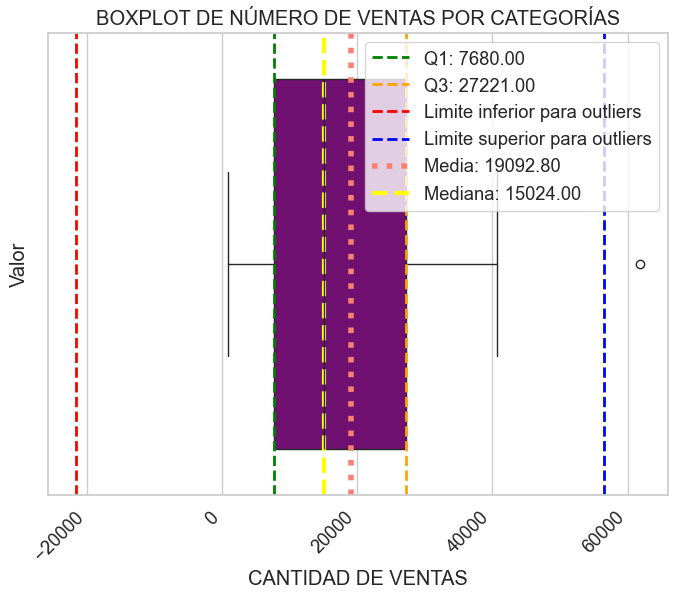

In [274]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_agrupado_categorias, x='numero_de_ventas', color='purple')

# Agregar líneas para Q1 y Q3
plt.axvline(Q1, color='green', linestyle='dashed', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='orange', linestyle='dashed', linewidth=2, label=f'Q3: {Q3:.2f}')

# Agregar líneas para los límites inferior y superior de outliers
plt.axvline(lower_limit, color='red', linestyle='dashed', linewidth=2, label=f'Limite inferior para outliers')
plt.axvline(upper_limit, color='blue', linestyle='dashed', linewidth=2, label=f'Limite superior para outliers')

plt.axvline(media_ventas, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_ventas:.2f}')
plt.axvline(mediana_ventas, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_ventas:.2f}')

plt.title('Boxplot de Número de Ventas')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',)
ax.set_xlabel('CANTIDAD DE VENTAS')
ax.set_ylabel('Valor')

ax.set_title('BOXPLOT DE NÚMERO DE VENTAS POR CATEGORÍAS')
plt.legend()

plt.savefig('./utils/categorias_boxplot.png')

plt.show()

**CONCLUSIÓN:**

- **Q1** = 7680, lo cual quiere decir que el 25% de los datos están por debajo de 7680. 
- **Q3** = 27221, significa que el 75% de los datos están por debajo de 27221. <br>
Esto implica que el 25% restante tiene valores superiores a 27221.
- **OUTLIER** = gran cantidad de ventas en la categoría de 'Móviles y Tablets'.

> 5. ANÁLISIS DE KURTOSIS Y SIMETRÍA DE LAS VENTAS

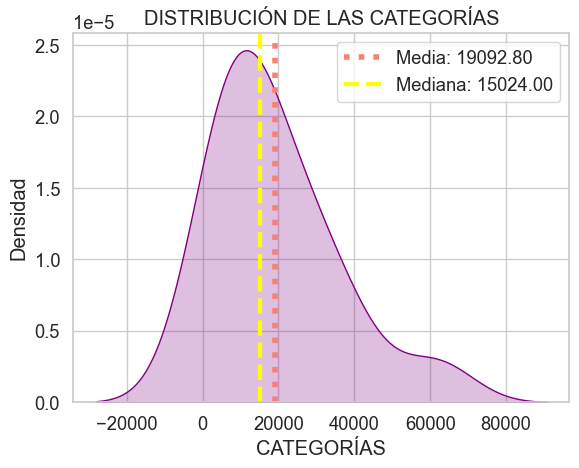

kurtosis: 0.91
simetria: 1.19
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica positiva (sesgo hacia la derecha).


In [275]:
from scipy.stats import kurtosis, skew

sns.kdeplot(data=df_agrupado_categorias, x='numero_de_ventas', fill=True, color='purple',)

kurtosis_valor = kurtosis(df_agrupado_categorias['numero_de_ventas'])
simetria_valor = skew(df_agrupado_categorias['numero_de_ventas'])

# Líneas verticales para las estadísticas
plt.axvline(media_ventas, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_ventas:.2f}')
plt.axvline(mediana_ventas, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_ventas:.2f}')


plt.title('DISTRIBUCIÓN DE LAS CATEGORÍAS')
plt.xlabel('CATEGORÍAS')
plt.ylabel('Densidad')

plt.legend()

plt.savefig('./utils/categorias_kdeplot.png')
plt.show()

# ANÁLISIS KURTOSIS Y SIMETRÍA
print(f"kurtosis: {kurtosis_valor:.2f}")
print(f"simetria: {simetria_valor:.2f}")

if kurtosis_valor > 0:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 0:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor > 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor < 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")

**CONCLUSIÓN:**

- **Kurtosis: 0.91 - Distribución leptocúrtica**:

La leptocurtosis indica que la distribución de las ventas en las categorías tiene colas más pesadas y picos más agudos en comparación con una distribución normal. <br>
Esto podría significar que algunas categorías tienen un rendimiento significativamente mejor que el promedio, creando colas más pronunciadas en la distribución.

- **Simetría: 1.19 - Asimetría positiva:**

La asimetría positiva indica que la distribución está sesgada hacia la derecha.
Esto sugiere que hay algunas categorías con un rendimiento muy alto en comparación con la mayoría, lo que provoca el sesgo hacia la derecha. 

#### 8.1.2 INGRESOS OBTENIDOS POR CATEGORÍAS DE PRODUCTOS


> 1. AGRUPACIÓN DE CATEGORÍAS POR INGRESOS

Al igual que analizamos la cantidad de ventas en relación a cada categoría, se analizará los ingresos obtenidos por cada una de ellas. 

In [57]:
df_categorias_valor = df_ventas_online.groupby('categoria')[['valor']].sum().reset_index()
df_categorias_valor

,categoria,valor
0,Artículos de Regalo,6.223453e+05
1,Belleza y Cuidado Personal,2.890640e+06
2,Computadoras,1.035744e+07
3,Electrodomésticos,3.344141e+07
4,Entretenimiento,3.042948e+07
5,Escuela y Educación,1.204539e+05
6,Hogar y Decoración,1.918317e+06
7,Libros,3.303033e+04
8,Moda Hombres,5.163376e+06
9,Moda Mujeres,7.359614e+06


> 2. GRÁFICO DE BARRAS DE LOS INGRESOS POR CATEGORÍAS

C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\827452796.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='categoria', y='valor', data=df_categorias_valor_sorted, palette=palette)
C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\827452796.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


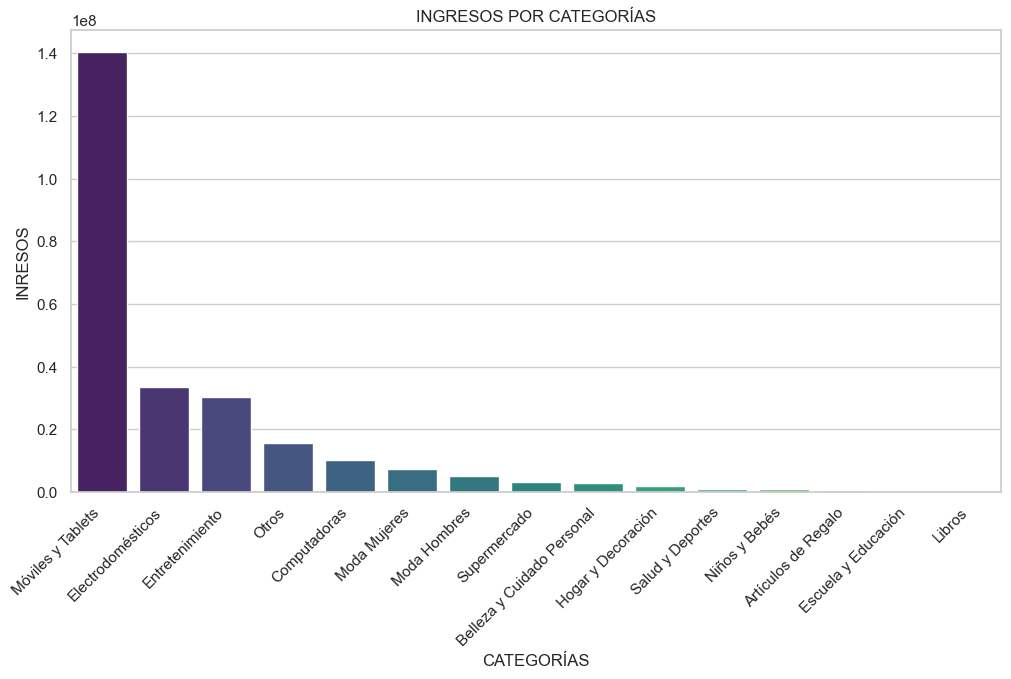

In [276]:
df_categorias_valor_sorted = df_categorias_valor.sort_values(by='valor', ascending=False)

# Estilo del gráfico
sns.set(style="whitegrid")
palette = sns.color_palette('viridis', n_colors=15)

# Creación gráfico de barras con los datos ordenados
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='categoria', y='valor', data=df_categorias_valor_sorted, palette=palette)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('CATEGORÍAS')
plt.ylabel('INRESOS')
plt.title('INGRESOS POR CATEGORÍAS')

plt.savefig('./utils/categorias_ingresos_barplot.png')

plt.show()

**CONCLUSIÓN:** Las categorías que más ingresos han generado son:
1. 'Móviles y Tablets', 
2. 'Electrodomésticos',
3. 'Entretenimiento'.


> 3. HISTOGRAMA DE DISTRIBUCIÓN DE INGRESOS

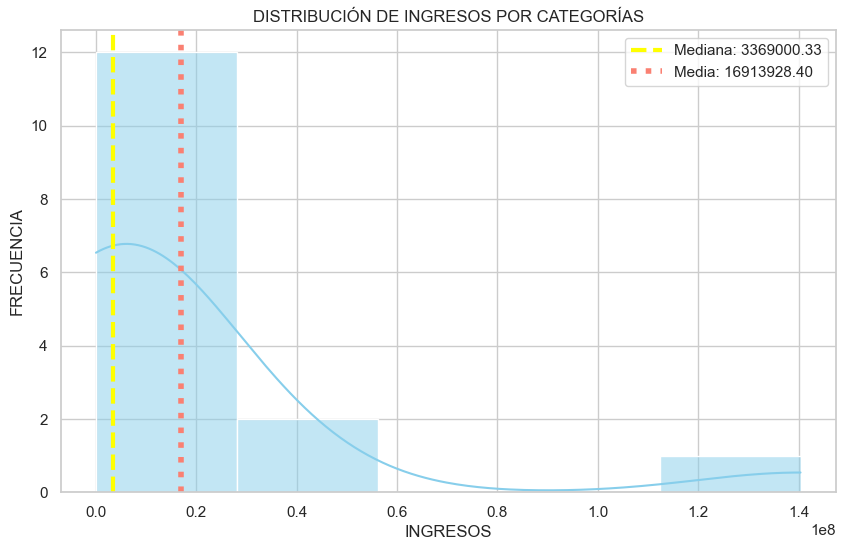

In [277]:
plt.figure(figsize=(10, 6))
sns.histplot(df_categorias_valor['valor'], bins=5, kde=True, color='skyblue')

# Cálculo de la mediana y la media
mediana_valor = df_categorias_valor['valor'].median()
media_valor = df_categorias_valor['valor'].mean()

# Líneas verticales para la mediana y la media
plt.axvline(mediana_valor, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_valor:.2f}')
plt.axvline(media_valor, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_valor:.2f}')

# Título y etiquetas
plt.title('DISTRIBUCIÓN DE INGRESOS POR CATEGORÍAS')
plt.xlabel('INGRESOS')
plt.ylabel('FRECUENCIA')

plt.legend()

plt.savefig('./utils/categorias_ingresos_histograma.png')

plt.show()

**CONCLUSIÓN:** Se puede observar lo mismo que sucedía con las ventas y hasta en mayor volumen, que hay una **distribución asimétrica positiva** de los ingresos obtenidos por categorías. <br>
Claramente en la cola hacia la derecha se encuentra el valor más alto obtenido por la gran cantidad de ventas en 'Móviles y Tablets'.

> 4. BOXPLOT SOBRE INGRESOS, CUARTILES E IDENTIFICACIÓN DE OUTLIERS 


In [278]:
Q1 = df_categorias_valor['valor'].quantile(0.25)
Q3 = df_categorias_valor['valor'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_categorias_valor[(df_categorias_valor['valor'] < lower_limit) | (df_categorias_valor['valor'] > upper_limit)]

# Detectar el outlier

print('Las categorías que se consideran outliers son las siguientes:\n', outliers)

Las categorías que se consideran outliers son las siguientes:
             categoria         valor
3   Electrodomésticos  3.344141e+07
10  Móviles y Tablets  1.403984e+08


C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\494854328.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',)


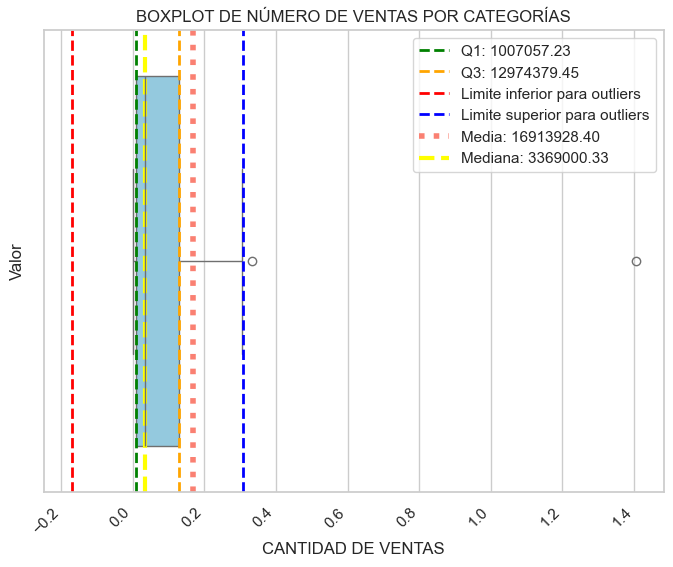

In [280]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_categorias_valor, x='valor', color='skyblue')

# Agregar líneas para Q1 y Q3
plt.axvline(Q1, color='green', linestyle='dashed', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='orange', linestyle='dashed', linewidth=2, label=f'Q3: {Q3:.2f}')

# Agregar líneas para los límites inferior y superior de outliers
plt.axvline(lower_limit, color='red', linestyle='dashed', linewidth=2, label=f'Limite inferior para outliers')
plt.axvline(upper_limit, color='blue', linestyle='dashed', linewidth=2, label=f'Limite superior para outliers')

plt.axvline(media_valor, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_valor:.2f}')
plt.axvline(mediana_valor, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_valor:.2f}')

plt.title('Boxplot de Número de Ventas')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',)
ax.set_xlabel('CANTIDAD DE VENTAS')
ax.set_ylabel('Valor')

ax.set_title('BOXPLOT DE NÚMERO DE VENTAS POR CATEGORÍAS')
plt.legend()

plt.savefig('./utils/categorias_ingresos_boxplot.png')

plt.show()

**CONCLUSIÓN:**

- **Q1** = 1007057.23, lo cual quiere decir que el 25% de los datos están por debajo de ese monto. 
- **Q3** = 12974379.45, significa que el 75% de los datos están por debajo del mismo. <br>
Esto implica que el 25% restante tiene valores superiores a 12974379.45.
- **OUTLIERS** = Gran cantidad de ingresos en las categorías de 'Móviles y Tablets' y 'Electrodomésticos'.

> 5. ANÁLISIS DE KURTOSIS Y SIMETRÍA DE LOS INGRESOS

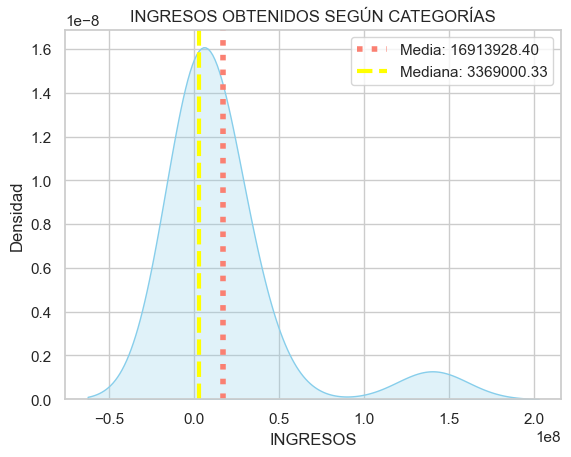

kurtosis: 7.89
simetria: 3.00
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica positiva (sesgo hacia la derecha).


In [281]:
sns.kdeplot(data=df_categorias_valor, x='valor', fill=True, color='skyblue',)

kurtosis_valor = kurtosis(df_categorias_valor['valor'])
simetria_valor = skew(df_categorias_valor['valor'])

# Líneas verticales para las estadísticas
plt.axvline(media_valor, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_valor:.2f}')
plt.axvline(mediana_valor, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_valor:.2f}')


plt.title('INGRESOS OBTENIDOS SEGÚN CATEGORÍAS')
plt.xlabel('INGRESOS')
plt.ylabel('Densidad')

plt.legend()

plt.savefig('./utils/categorias_ingresos_kdeplot.png')

plt.show()

#ANÁLISIS KURTOSIS Y SIMETRÍA
print(f"kurtosis: {kurtosis_valor:.2f}")
print(f"simetria: {simetria_valor:.2f}")

if kurtosis_valor > 0:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 0:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor > 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor < 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")

**CONCLUSIÓN**

- **Kurtosis: 7.89 - Distribución leptocúrtica**:

La leptocurtosis con un valor tan alto (7.89) sugiere colas extremadamente pesadas y un pico muy agudo en comparación con una distribución normal.
Hay una mayor concentración de datos en la cola hacia la derecha, lo que indica la presencia de valores extremadamente altos.

- **Simetría: 3.00 - Asimetría positiva:**

La asimetría positiva indica un sesgo hacia la derecha.
La mayoría de los datos están concentrados en el lado izquierdo de la distribución, con una "cola" más larga en el lado derecho debido a algunos valores extremadamente altos, que conforme se puede ver en el BoxPlot son la gran cantidad de ingresos de 2 categorías: Móviles y Tablets y Electrodomésticos. 

#### 8.1.3. ANÁLISIS DE CATEGORÍAS SEGÚN INGRESOS Y CANTIDAD DE VENTAS

> 1. DATAFRAME UNIDO DE LAS VENTAS E INGRESOS POR CATEGORÍAS 

In [72]:
df_categorias_final = pd.merge(df_agrupado_categorias,df_categorias_valor, on='categoria')
df_categorias_final

,categoria,numero_de_ventas,valor
0,Artículos de Regalo,7250,6.223453e+05
1,Belleza y Cuidado Personal,17899,2.890640e+06
2,Computadoras,8110,1.035744e+07
3,Electrodomésticos,33034,3.344141e+07
4,Entretenimiento,17352,3.042948e+07
5,Escuela y Educación,1090,1.204539e+05
6,Hogar y Decoración,13990,1.918317e+06
7,Libros,814,3.303033e+04
8,Moda Hombres,40713,5.163376e+06
9,Moda Mujeres,28334,7.359614e+06


> 2. GUARDO EN UN ARCHIVO CSV EL PRESENTE DATAFRAME 

In [74]:
df_categorias_final.to_csv('./data/2.processed/df_categorias_final.csv')

> 3. DIAGRAMA DE DISPERSIÓN CON LÍNEA DE REGRESIÓN.

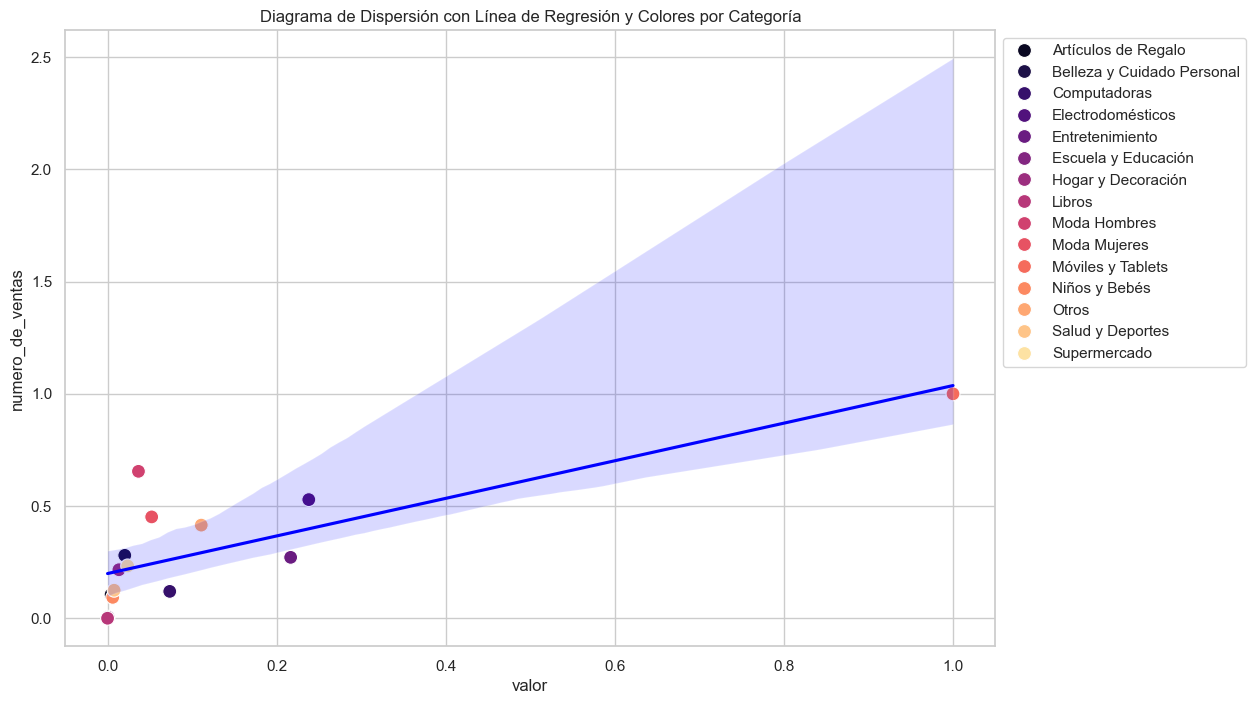

In [282]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='valor', y='numero_de_ventas', hue='categoria', data=df_categorias_final, palette='magma', s=100)
sns.regplot(x='valor', y='numero_de_ventas', data=df_categorias_final, scatter=False, color='blue')

# Ajustar la leyenda y etiquetas
scatter_plot.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Diagrama de Dispersión con Línea de Regresión y Colores por Categoría')

plt.savefig('./utils/categorias_ingresos_ventas_scatterplot.png')

plt.show()

**CONCLUSIÓN:** Hay una **relación positiva** entre las variables de numero de ventas y los ingresos obtenidos por las mismas según cada categoría. <br>
Es decir, a mayor ventas según la categoría mayor ingresos. Una de las excepciones es la categoría 'Moda Hombres' donde según los gráficos anteriores, pudimos oberservar que es una de las que mas ventas genera, pero no se encuentra dentro de las categorías que implican mayor ingresos para la empresa. 

> 4. HISTOGRAMA DE DISTRIBUCIÓN DE VENTAS E INGRESOS POR CATEGORÍAS (Normalizado)

Procedo a normalizar los valores para que se pueda apreciar la distribución entre las variables 'números de ventas' y 'valor', ya que tienen distintas escalas. 

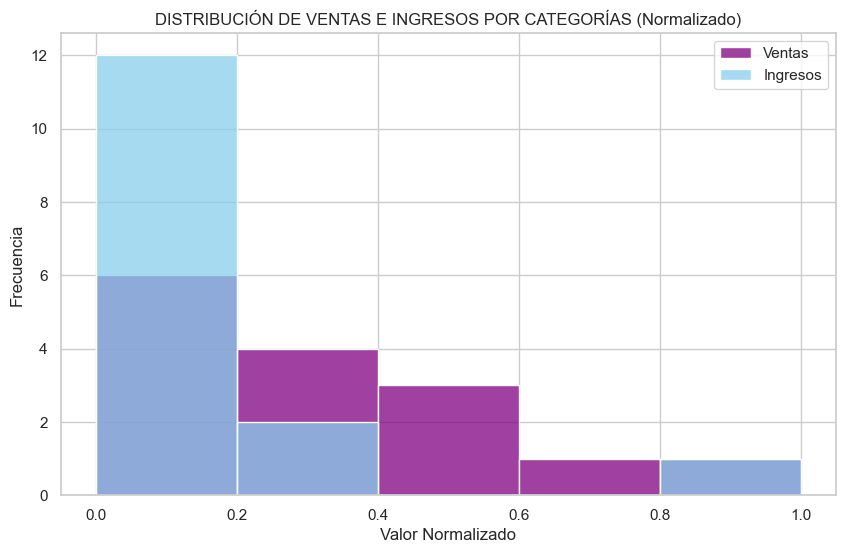

In [283]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar las variables Ventas e Ingresos
scaler = MinMaxScaler()
df_categorias_final[['numero_de_ventas', 'valor']] = scaler.fit_transform(df_categorias_final[['numero_de_ventas', 'valor']])

# Histograma con las variables normalizadas
plt.figure(figsize=(10, 6))

# Histograma de Ventas
sns.histplot(df_categorias_final['numero_de_ventas'], bins=5, kde=False, color='purple', label='Ventas')

# Histograma de Ingresos
sns.histplot(df_categorias_final['valor'], bins=5, kde=False, color='skyblue', label='Ingresos')

plt.title('DISTRIBUCIÓN DE VENTAS E INGRESOS POR CATEGORÍAS (Normalizado)')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()

plt.savefig('./utils/categorias_ingresos_ventas_histograma.png')

plt.show()

#### 8.2.4. CORRELACIÓN DE SPEARMAN - PRUEBA HIPÓTESIS

- **Hipótesis nula (H0)**: No hay correlación lineal significativa entre las dos variables.
- **Hipótesis alternativa (Ha)**: Existe una correlación lineal significativa entre las dos variables.

In [265]:

from scipy.stats import spearmanr

correlation, p_value_spearman = spearmanr(df_categorias_final['numero_de_ventas'], df_categorias_final['valor'])

# Imprimir resultados
print(f"\nPrueba de Correlación de Spearman: correlation = {correlation}, p_value = {p_value_spearman}")

# Interpretar los resultados
alpha = 0.05
if p_value_spearman < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de una correlación significativa entre la cantidad de ventas y los ingresos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay correlación significativa entre la cantidad de ventas y los ingresos.")


Prueba de Correlación de Spearman: correlation = 0.8285714285714284, p_value = 0.00013524478013276988
Rechazamos la hipótesis nula. Hay evidencia de una correlación significativa entre la cantidad de ventas y los ingresos.


### 8.2. ANÁLISIS TEMPORAL DE LAS VENTAS

#### 8.2.0. MODIFICACIONES PREVIAS

> 1. DESCARGA DATAFRAME - MODIFICACIÓN ÍNDICE - CONVERSIÓN A OBJETO DATETIME

Para el siguiente análisis descargo el CSV nombrado 'df_ventas_online', y al mismo tiempo, le indico que la columna 'fecha_de_pedido' será el índice del DataFrame. <br>
Posteriormente, convierto el índice que contiene fechas, a objeto DateTime, para una mayor facilidad en el análisis de las ventas según las fechas. <br>
Por último, guardo dicho DataFrame en un nuevo archivo csv con las nuevas características en cuanto al índice. 

In [85]:
df_ventas_online = pd.read_csv('./data/2.processed/df_ventas_online.csv', index_col='fecha_de_pedido')

In [87]:
df_ventas_online.index = pd.to_datetime(df_ventas_online.index)

In [90]:
df_ventas_online.to_csv('./data/2.processed/df_ventas_online_fechas.csv')

> 2. Creación de DataFrame con la cantidad de ventas e ingresos por meses 

El objeto del presente título es crear un DataFrame con los meses de ventas, según las fechas de pedidos, donde tendrá además dos columnas: los ingresos generados cada mes y la cantidad de ventas, aspectos que se analizarán separada y conjuntamente. <br>

Realizo por separado un `.resample()`, lo que generará la agrupación de los mismos por intervalos mensuales. <br> 
Seguidamente, al crear el DataFrame con el índice de fechas, modifico el formato de los valores de la columna 'fecha', para que se vean los nombres de los meses y el año, para una mayor apreciación en gráficos. <br>
Por último, traduzco los nombres de los meses como hice al principio del notebook, para dar uniformidad en el lenguaje del EDA. 

Para concluir uno los 2 DataFrames creados con un `.merge()`.

In [123]:
# DF VENTAS MENSUALES

ventas_por_mes = df_ventas_online.resample('M').size()

# CONVIERTO LA SERIE 'ventas_por_mes' a un DATAFRAME.
df_ventas_mensuales = pd.DataFrame({'meses': ventas_por_mes.index, 
                                    'ventas': ventas_por_mes.values})

# MODIFICO LA COLUMNA MESES PARA QUE SE VEAN LOS NOMBRES, Y NO LAS FECHAS.
df_ventas_mensuales['meses'] = df_ventas_mensuales['meses'].dt.strftime('%B %Y')  # '%B' devuelve el nombre completo del mes

# TRADUZCO LOS MESES AL ESPAÑOL
traduccion_meses = {
                'October 2020' : 'Octubre 2020',
                'November 2020' : 'Noviembre 2020',
                'December 2020' : 'Diciembre 2020',
                'January 2021' : 'Enero 2021',
                'February 2021' : 'Febrero 2021',
                'March 2021' : 'Marzo 2021',
                'April 2021' : 'Abril 2021',
                'May 2021' : 'Mayo 2021',
                'June 2021' : 'Junio 2021',
                'July 2021' : 'Julio 2021',
                'August 2021' : 'Agosto 2021',
                'September 2021' : 'Septiembre 2021'
}

df_ventas_mensuales['meses'] = df_ventas_mensuales['meses'].replace(traduccion_meses)
df_ventas_mensuales

,meses,ventas
0,Octubre 2020,9287
1,Noviembre 2020,17364
2,Diciembre 2020,82528
3,Enero 2021,17212
4,Febrero 2021,10141
5,Marzo 2021,26852
6,Abril 2021,42138
7,Mayo 2021,14815
8,Junio 2021,26804
9,Julio 2021,15340


In [128]:
# DF INGRESOS MENSUALES

df_valor_mensuales = df_ventas_online.resample('M')['valor'].sum()

# CONVIERTO LA SERIE 'ventas_por_mes' a un DATAFRAME.
df_valor_mensuales = pd.DataFrame({'meses': df_valor_mensuales.index, 
                                    'ingresos': df_valor_mensuales.values})


# MODIFICO LA COLUMNA MESES PARA QUE SE VEAN LOS NOMBRES, Y NO LAS FECHAS.
df_valor_mensuales['meses'] = df_valor_mensuales['meses'].dt.strftime('%B %Y')  # '%B' devuelve el nombre completo del mes

traduccion_meses = {
                'October 2020' : 'Octubre 2020',
                'November 2020' : 'Noviembre 2020',
                'December 2020' : 'Diciembre 2020',
                'January 2021' : 'Enero 2021',
                'February 2021' : 'Febrero 2021',
                'March 2021' : 'Marzo 2021',
                'April 2021' : 'Abril 2021',
                'May 2021' : 'Mayo 2021',
                'June 2021' : 'Junio 2021',
                'July 2021' : 'Julio 2021',
                'August 2021' : 'Agosto 2021',
                'September 2021' : 'Septiembre 2021'
}

df_valor_mensuales['meses'] = df_valor_mensuales['meses'].replace(traduccion_meses)


In [132]:
# MERGE DE LOS 2 DATAFRAMES
df_meses_e_ingresos = pd.merge(df_valor_mensuales, df_ventas_mensuales, on='meses')

In [136]:
df_meses_e_ingresos.to_csv('./data/2.processed/df_meses_e_ingresos_mensuales.csv')

#### 8.2.1. ANÁLISIS TEMPORAL DE LA CANTIDAD DE VENTAS MENSUALES

> 2. ANÁLISIS DE ESTADÍSTICA CENTRAL Y OUTLIERS - BOXPLOT PARA OBSERVAR LA DISTRIBUCIÓN DE VENTAS EN UN AÑO

In [284]:
mediana_ventas2 = df_meses_e_ingresos['ventas'].median()
media_ventas2 = df_meses_e_ingresos['ventas'].mean()

Q1 = df_meses_e_ingresos['ventas'].quantile(0.25)
Q3 = df_meses_e_ingresos['ventas'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Detectar el outlier
outliers = df_meses_e_ingresos[(df_meses_e_ingresos['ventas'] < lower_limit) | (df_meses_e_ingresos['ventas'] > upper_limit)]

# CONCLUSIONES
print('- La media de ventas por mes en un año es:', media_ventas2)
print('- La mediana de ventas por mes en un año es:', mediana_ventas2)
print('- El mes que se considera outlier es el siguiente:\n', outliers)

- La media de ventas por mes en un año es: 23866.0
- La mediana de ventas por mes en un año es: 16276.0
- El mes que se considera outlier es el siguiente:
             meses      ingresos  ventas
2  Diciembre 2020  6.642794e+07   82528


C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\3157019965.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right',)


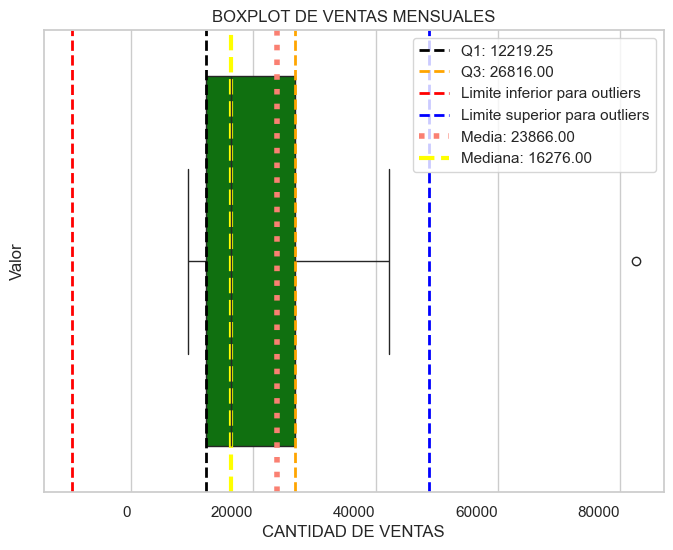

In [285]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_meses_e_ingresos, x='ventas', color='green')

# Agregar líneas para Q1 y Q3
plt.axvline(Q1, color='black', linestyle='dashed', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='orange', linestyle='dashed', linewidth=2, label=f'Q3: {Q3:.2f}')

# Agregar líneas para los límites inferior y superior de outliers
plt.axvline(lower_limit, color='red', linestyle='dashed', linewidth=2, label=f'Limite inferior para outliers')
plt.axvline(upper_limit, color='blue', linestyle='dashed', linewidth=2, label=f'Limite superior para outliers')

plt.axvline(media_ventas2, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_ventas2:.2f}')
plt.axvline(mediana_ventas2, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_ventas2:.2f}')

plt.title('Boxplot de Ventas Mensuales')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right',)
ax.set_xlabel('CANTIDAD DE VENTAS')
ax.set_ylabel('Valor')

ax.set_title('BOXPLOT DE VENTAS MENSUALES')
plt.legend()

plt.savefig('./utils/ventas_mensuales_boxplot.png')

plt.show()

> 3. HISTOGRAMA PARA ANALIZAR LA DISTRIBUCIÓN DE LAS VENTAS

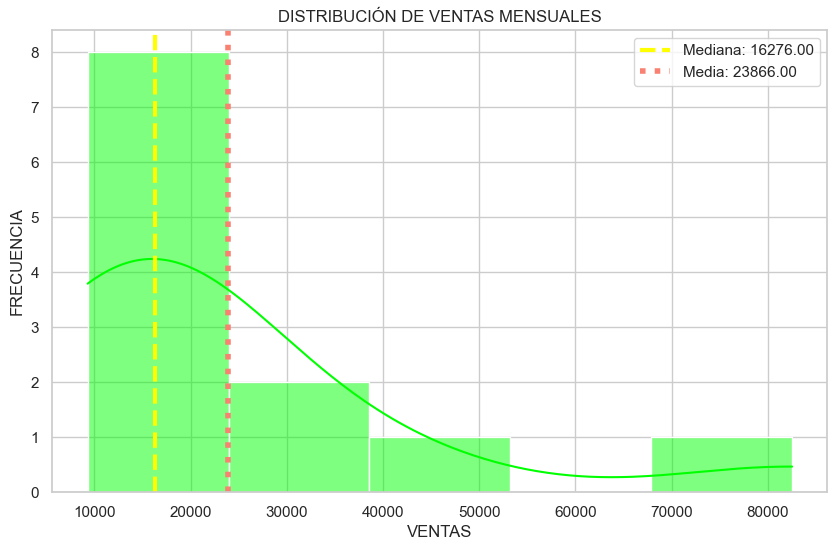

In [286]:
plt.figure(figsize=(10, 6))
sns.histplot(df_meses_e_ingresos['ventas'], bins=5, kde=True, color='#00FF00')

# Líneas verticales para la mediana y la media
plt.axvline(mediana_ventas2, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_ventas2:.2f}')
plt.axvline(media_ventas2, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_ventas2:.2f}')

# Título y etiquetas
plt.title('DISTRIBUCIÓN DE VENTAS MENSUALES')
plt.xlabel('VENTAS')
plt.ylabel('FRECUENCIA')

plt.legend()

plt.savefig('./utils/ventas_mensuales_histograma.png')

plt.show()

**CONCLUSIÓN:** Como sucedía en el análisis de las ventas según categorías, acá también podemos observar una **distribución asimétrica positiva**. <br>
Esto se debe a la presencia de outliers, como es el mes de Diciembre del año 2020, mes donde ocurrió la mayor cantidad de ventas. 

> 3. GRÁFICO DE LÍNEAS PARA VER LA DISTRIBUCIÓN DE LAS VENTAS MENSUALES

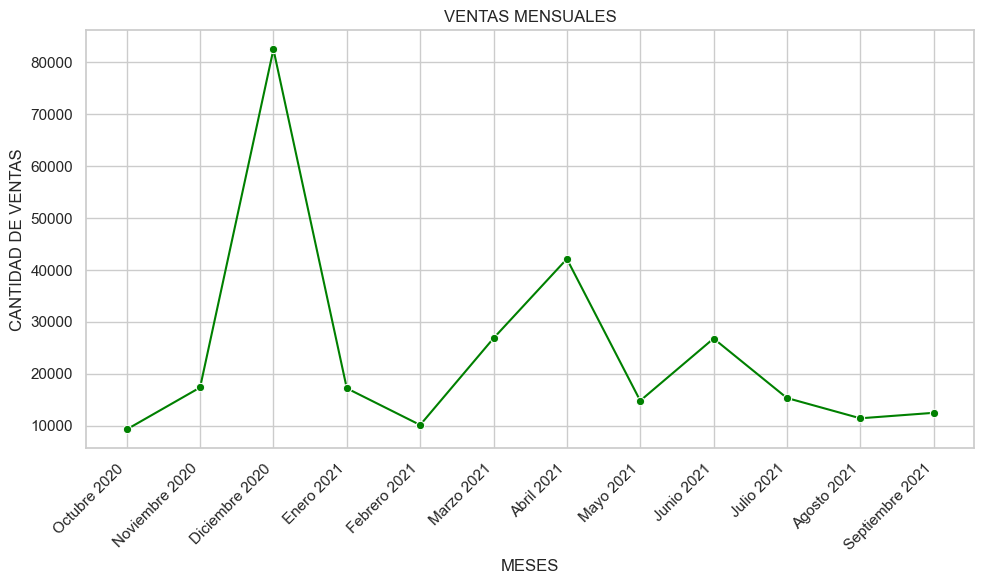

In [287]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='meses', y='ventas', marker='o', linestyle='-', color='green', data=df_meses_e_ingresos)

# Configurar etiquetas y título
plt.xlabel('MESES')
plt.ylabel('CANTIDAD DE VENTAS')
plt.title('VENTAS MENSUALES')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()

plt.savefig('./utils/ventas_mensuales_lineas.png')

plt.show()

**OBSERVACIÓN:** 
1. **DICIEMBRE 2020**: A simple vista podemos observar que es el mes con mayor cantidad de ventas, en el cual se festeja la navidad y despedidas de año, lo que podría explicar el aumento en las ventas. 
2. **ABRIL 2021**: Se encuentra en segundo lugar, y puede coincidir con que es el mes donde se presentan impuestos en Estados Unidos, por ende, las personas pueden recibir reembolsos de impuestos y decidir gastar ese dinero, lo que podría influir en las ventas.
3. **JUNIO 2021**: Está en el tercer lugar, podría deberse a que es el mes donde comienza el verano, y las personas pueden realizar compras relacionadas con las vacaciones de verano, eventos al aire libre y actividades estacionales.

#### 8.2.2. ANÁLISIS TEMPORAL DE LOS INGRESOS POR VENTAS MENSUALES

> 1. ESTADÍSTICA CENTRAL DE LOS INGRESOS MENSUALES - BOXPLOT VER CUARTILES INGRESOS Y OUTLIERS

In [152]:
mediana_ingresos = df_meses_e_ingresos['ingresos'].median()
media_ingresos = df_meses_e_ingresos['ingresos'].mean()

Q1 = df_meses_e_ingresos['ingresos'].quantile(0.25)
Q3 = df_meses_e_ingresos['ingresos'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Detectar el outlier
outliers = df_meses_e_ingresos[(df_meses_e_ingresos['ingresos'] < lower_limit) | (df_meses_e_ingresos['ingresos'] > upper_limit)]

# CONCLUSIONES
print('- La media de ingresos por mes en un año es:', media_ingresos)
print('- La mediana de ingresos por mes en un año es:', mediana_ingresos)
print('- El ingreso mas elevado que se considera outlier es el siguiente:\n', outliers)

- La media de ingresos por mes en un año es: 21142410.506166667
- La mediana de ingresos por mes en un año es: 16427458.2025
- El ingreso mas elevado que se considera outlier es el siguiente:
             meses      ingresos  ventas
2  Diciembre 2020  6.642794e+07   82528


C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\3041125065.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right',)


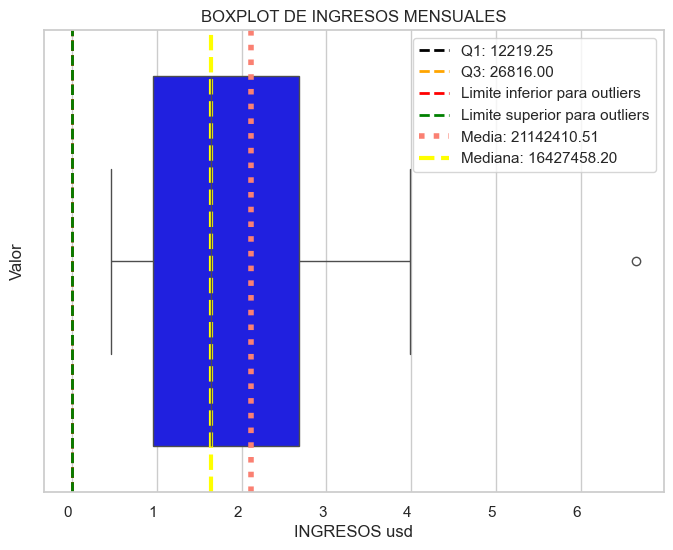

In [288]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_meses_e_ingresos, x='ingresos', color='blue')

# Agregar líneas para Q1 y Q3
plt.axvline(Q1, color='black', linestyle='dashed', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='orange', linestyle='dashed', linewidth=2, label=f'Q3: {Q3:.2f}')

# Agregar líneas para los límites inferior y superior de outliers
plt.axvline(lower_limit, color='red', linestyle='dashed', linewidth=2, label=f'Limite inferior para outliers')
plt.axvline(upper_limit, color='green', linestyle='dashed', linewidth=2, label=f'Limite superior para outliers')

plt.axvline(media_ingresos, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_ingresos:.2f}')
plt.axvline(mediana_ingresos, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_ingresos:.2f}')

plt.title('Boxplot de Ingresos Mensuales')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right',)
ax.set_xlabel('INGRESOS usd')
ax.set_ylabel('Valor')

ax.set_title('BOXPLOT DE INGRESOS MENSUALES')
plt.legend()

plt.savefig('./utils/ventas_ingresos_mensuales_boxplot.png')

plt.show()

> 2. HISTOGRAMA PARA OBSERVAR LA DISTRIBUCIÓN DE INGRESOS MENSUALES

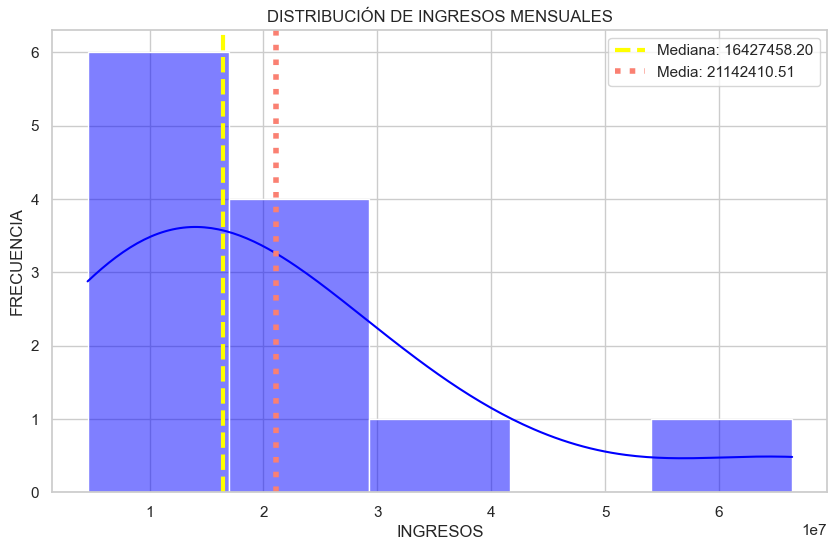

In [289]:
plt.figure(figsize=(10, 6))
sns.histplot(df_meses_e_ingresos['ingresos'], bins=5, kde=True, color="#0000FF")

# Líneas verticales para la mediana y la media
plt.axvline(mediana_ingresos, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_ingresos:.2f}')
plt.axvline(media_ingresos, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_ingresos:.2f}')

# Título y etiquetas
plt.title('DISTRIBUCIÓN DE INGRESOS MENSUALES')
plt.xlabel('INGRESOS')
plt.ylabel('FRECUENCIA')

plt.legend()

plt.savefig('./utils/ventas_ingresos_mensuales_histograma.png')

plt.show()

**CONCLUSION**: Vemos también acá una **distribución asimétrica positiva**, aunque con una mayor concentracioón de datos alrededor de la media y la mediana. 

> 3. GRÁFICO DE LÍNEA PARA OBSERVAR LOS INGRESOS MENSUALES POR VENTAS

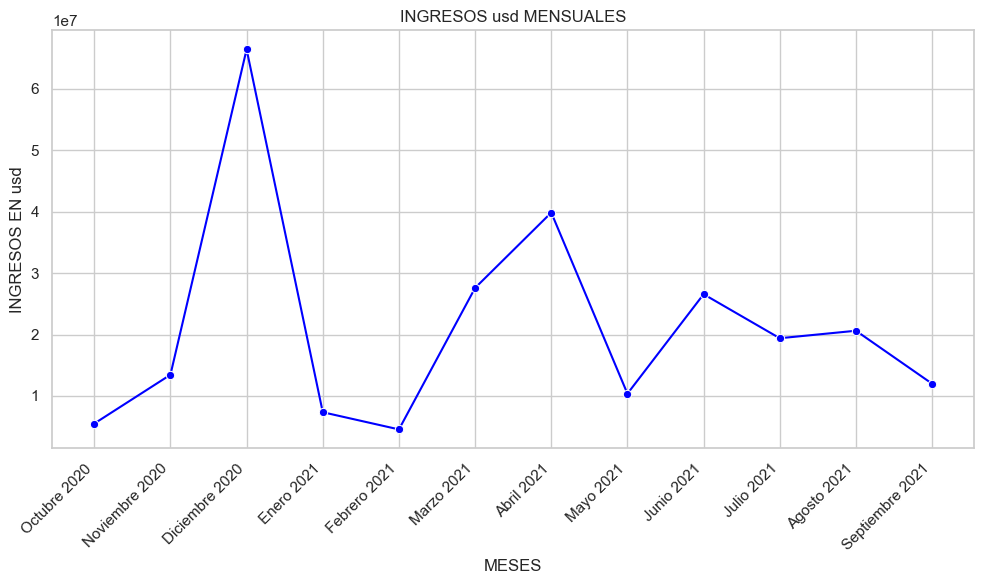

In [290]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='meses', y='ingresos', marker='o', linestyle='-', color='blue', data=df_meses_e_ingresos)

# Configurar etiquetas y título
plt.xlabel('MESES')
plt.ylabel('INGRESOS EN usd')
plt.title('INGRESOS usd MENSUALES')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()

plt.savefig('./utils/ventas_ingresos_mensuales_linea.png')

plt.show()

**CONCLUSIÓN**: Puede observarse una distribución muy parecida a la cantidad de ventas por mes, aunque con pequeñas diferencias en el mes de agosto del año 2021, como se podrá observar mejor en el Punto 8.2.3.

#### 8.2.3. ANÁLISIS DE CORRELACIÓN ENTRE LAS VARIABLES INGRESOS Y VENTAS RESPECTO A LOS MESES

> 1. `Barplot` con barras apiladas para destacar la diferencia entre los meses respecto a los ingresos y cantidad de ventas

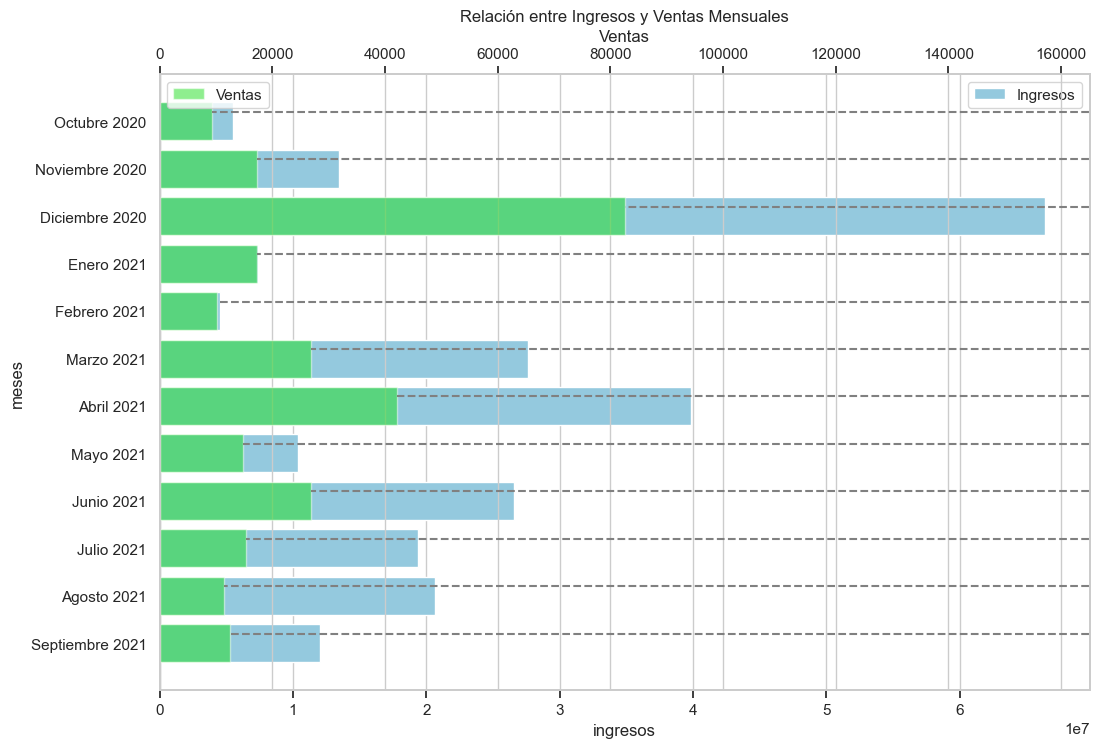

In [291]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontales agrupadas con dos ejes y
plt.figure(figsize=(12, 8))
bar_height = 0.4

# Barra para ingresos
bar1 = sns.barplot(x='ingresos', y='meses', data=df_meses_e_ingresos, color="skyblue", label='Ingresos', orient='h')

# Configurar un segundo eje y
ax2 = plt.gca().twiny()

# Barra para ventas
bar2 = sns.barplot(x='ventas', y='meses', data=df_meses_e_ingresos, color='#00FF00', alpha=0.5, label='Ventas', orient='h')

# Configurar las posiciones de las barras para el segundo eje y
ax2.set_xlim(0, df_meses_e_ingresos['ventas'].max() * 2)

# Agregar líneas para resaltar los puntos de conexión
for i in range(len(df_meses_e_ingresos)):
    plt.plot([df_meses_e_ingresos['ingresos'][i], df_meses_e_ingresos['ventas'][i]],
             [bar1.patches[i].get_y() + bar_height/2, ax2.patches[i].get_y() + bar_height/2],
             linestyle='--', color='gray')

plt.title('Relación entre Ingresos y Ventas Mensuales')
ax2.set_xlabel('Ventas')
plt.ylabel('Meses')

# Ajustar la posición de las etiquetas del eje y
plt.yticks(range(len(df_meses_e_ingresos)), df_meses_e_ingresos['meses'])
plt.legend(loc='upper left')

plt.savefig('./utils/ventas_ingresos_mensuales_barplot.png')

plt.show()

> 2. Gráficos de líneas con valores normalizados para comprar ingresos y cantidad de ventas mensuales

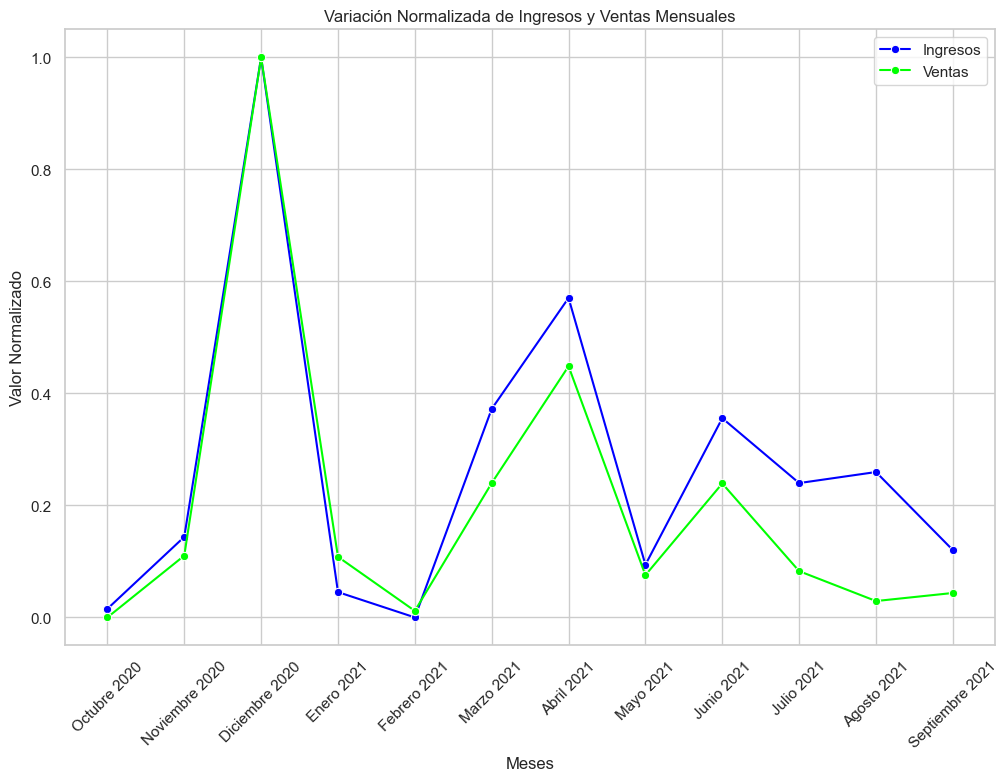

In [292]:
from sklearn.preprocessing import MinMaxScaler

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un DataFrame para almacenar los datos normalizados
df_normalized = df_meses_e_ingresos.copy()

# Normalizar ingresos y ventas utilizando Min-Max scaling
scaler = MinMaxScaler()
df_normalized[['ingresos', 'ventas']] = scaler.fit_transform(df_normalized[['ingresos', 'ventas']])

# Crear un gráfico de líneas para ingresos y ventas normalizadas
plt.figure(figsize=(12, 8))

# Línea para ingresos
sns.lineplot(x='meses', y='ingresos', data=df_normalized, marker='o', color='blue', label='Ingresos')

# Línea para ventas
sns.lineplot(x='meses', y='ventas', data=df_normalized, marker='o', color='#00FF00', label='Ventas')

plt.title('Variación Normalizada de Ingresos y Ventas Mensuales')
plt.xlabel('Meses')
plt.ylabel('Valor Normalizado')
plt.xticks(rotation=45)
plt.legend()

plt.savefig('./utils/ventas_ingresos_mensuales_lineas2.png')

plt.show()

### 8.3. ANÁLISIS DE VENTAS EN RELACIÓN A LA EDAD DE LOS CONSUMIDORES

#### 8.3.1. CANTIDAD DE VENTAS POR RANGOS DE EDAD 

> 1. Realizo un `pd.cut` para crear intervalos de edades y luego una `pivot_table` para analizar las edades y su comportamiento ante las compras online

In [171]:
edad = pd.cut(df_ventas_online['edad'], [18, 30, 40, 50, 60, 70, 80])
df_edad_y_ventas = df_ventas_online.pivot_table('valor', index= edad, aggfunc= 'count')
df_edad_y_ventas.rename(columns={'valor': 'ventas'}, inplace=True)

> 2. `Barplot` para observar como se distribuyen las ventas según los rangos de edades

C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\220003505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_edad_y_ventas.index, y='ventas', data=df_edad_y_ventas, palette=pastel_colors)


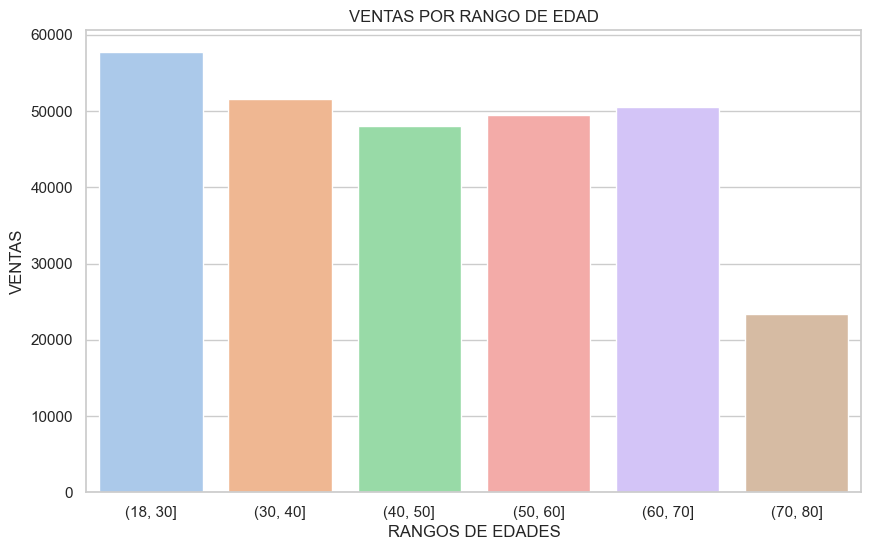

In [293]:
sns.set(style="whitegrid")
pastel_colors = sns.color_palette("pastel", n_colors=len(df_edad_y_ventas))

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_edad_y_ventas.index, y='ventas', data=df_edad_y_ventas, palette=pastel_colors)

plt.title('VENTAS POR RANGO DE EDAD')
plt.xlabel('RANGOS DE EDADES')
plt.ylabel('VENTAS')

plt.savefig('./utils/ventas_edades_barplot.png')

plt.show()

**CONCLUSIÓN**: Respecto al gráfico anterior puede deducirse que las personas que más compran de manera online a la empresa, son los comprendidos entre los 18 y 30 años, seguidos por los de 30 y 40 años. <br>
Asimismo, se observa un decaimiento en las compras en las personas de entre 40 y 50 años. <br>
Por último, el rango de edades que menos compran de manera online son las personas de entre 70 y 80 años. 

#### 8.3.2. CANTIDAD DE VENTAS POR CATEGORÍAS Y RANGOS DE EDAD 

> 1. Creo un DataFrame con las ventas y categorías según los rangos de edades.

In [179]:
df_edad_categorias = df_ventas_online.pivot_table('valor', index= 'categoria', columns= edad, aggfunc= 'count')

edad,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
categoria,,,,,,
Artículos de Regalo,1181,1173,1130,1361,1285,696
Belleza y Cuidado Personal,3573,3291,2768,3076,3531,1343
Computadoras,1758,1384,1380,1400,1380,672
Electrodomésticos,6804,6128,5196,5869,5708,2787
Entretenimiento,3617,3266,2965,2799,3045,1421
Escuela y Educación,290,174,218,157,178,54
Hogar y Decoración,3000,2583,2249,2372,2341,1191
Libros,180,123,143,144,158,44
Moda Hombres,8155,6972,6605,7442,7317,3272


> 2. Gráfico de líneas para observar el comportamiento de compra según edad y categorías

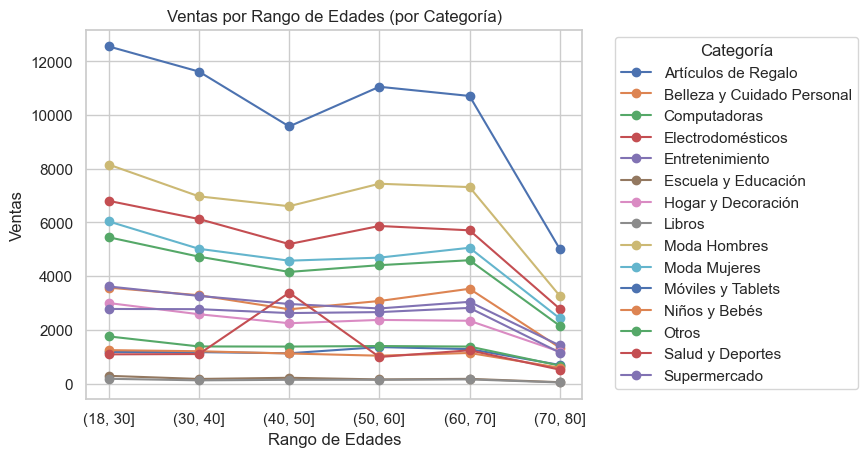

In [294]:
df_edad_categorias.T.plot(marker='o')
plt.title('Ventas por Rango de Edades (por Categoría)')
plt.xlabel('Rango de Edades')
plt.ylabel('Ventas')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('./utils/ventas_edades_lineas.png')

plt.show()

**CONCLUSIÓN**: Puede verse un comportamiento similiar al de cantidad de ventas por edades, con un leve decaimiento en el rango entre 40 y 50 años.
Con la excepción de que dichas personas, en relación a otras categorías, adquieren mas productos de 'Salud y Deportes'.

<Figure size 1200x800 with 0 Axes>

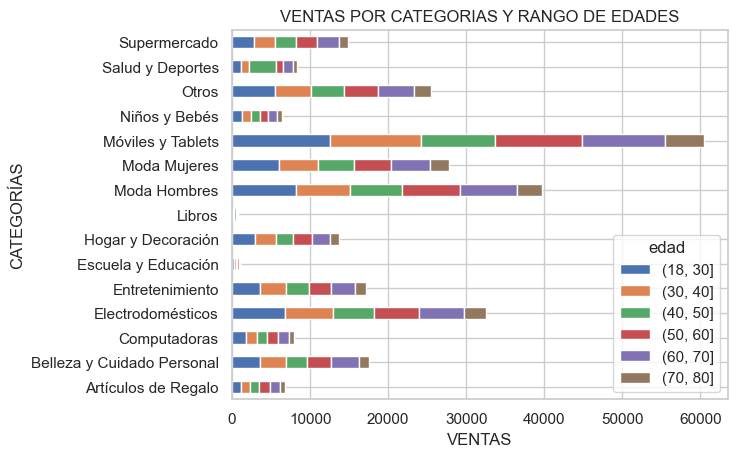

In [295]:
plt.figure(figsize=(12, 8))
df_edad_categorias.plot(kind='barh', stacked=True)
plt.title('VENTAS POR CATEGORIAS Y RANGO DE EDADES')
plt.xlabel('VENTAS')
plt.ylabel('CATEGORÍAS')

plt.savefig('./utils/ventas_edades_barrasApiladas.png')

plt.show()

**CONCLUSIÓN**: Como dijimos anteriormente puede observarse una distribución bastante parecida en cuanto a las categorías elegidas por cada rango de edad. 

### 8.4. ANÁLISIS SEGÚN VENTAS E INGRESOS RESPECTO A LOS ESTADOS DE USA

#### 8.4.1. NUEVO DATAFRAME AGRUPADO POR ESTADO RESPECTO A INGRESOS POR VENTAS E INGRESOS SALARIALES PROMEDIO

In [211]:
valor_por_estado = df_ventas_online.groupby('estado')[['valor']].sum()
valor_por_estado.sort_values(by='valor', ascending=False)
valor_por_estado.reset_index(inplace=True)

Seguidamente creo un diccionario con cada abreviatura de Estado y su nombre completo, para tener más conocimiento del nombre del Estado al que hagamos referencia en el análisis. <br>
Obtenida la variable con el diccionario, creo una nueva columna en el DataFrame, llamada 'estado_completo' y realizo un mapeo, para que ubique cada nombre completo conforme corresponda con la abreviatura. 

In [214]:
nombres_estados = {
    'TX': 'Texas',
    'CA': 'California',
    'NY': 'New York',
    'PA': 'Pennsylvania',
    'IL': 'Illinois',
    'FL': 'Florida',
    'OH': 'Ohio',
    'MO': 'Missouri',
    'VA': 'Virginia',
    'IA': 'Iowa',
    'MN': 'Minnesota',
    'NC': 'North Carolina',
    'KY': 'Kentucky',
    'MI': 'Michigan',
    'IN': 'Indiana',
    'WV': 'West Virginia',
    'GA': 'Georgia',
    'WI': 'Wisconsin',
    'OK': 'Oklahoma',
    'AL': 'Alabama',
    'CO': 'Colorado',
    'MA': 'Massachusetts',
    'NJ': 'New Jersey',
    'TN': 'Tennessee',
    'KS': 'Kansas',
    'AR': 'Arkansas',
    'LA': 'Louisiana',
    'MD': 'Maryland',
    'WA': 'Washington',
    'NE': 'Nebraska',
    'SC': 'South Carolina',
    'AZ': 'Arizona',
    'MS': 'Mississippi',
    'OR': 'Oregon',
    'MT': 'Montana',
    'CT': 'Connecticut',
    'SD': 'South Dakota',
    'NM': 'New Mexico',
    'ME': 'Maine',
    'UT': 'Utah',
    'AK': 'Alaska',
    'VT': 'Vermont',
    'ND': 'North Dakota',
    'ID': 'Idaho',
    'DC': 'District of Columbia',
    'WY': 'Wyoming',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'HI': 'Hawaii',
    'DE': 'Delaware',
    'RI': 'Rhode Island'
}

valor_por_estado['estado_completo'] = valor_por_estado['estado'].map(nombres_estados)

Realizo una agrupación por Estado y con la media de los ingresos familiares promedio según cada uno de ellos. 

In [ ]:
df_costos = df_costos.groupby('estado')[['ingreso_familiar_promedio']].mean().round(2)

Hago un `merge()` para obtener un DataFrame donde tenga todo unido, es decir, el estado (abreviatura y nombre completo), los ingresos obtenidos por ventas en cada Estado y los ingresos familiares promedio de cada Estado. 

In [219]:
df_costos_ingresos = pd.merge(valor_por_estado, df_costos, on='estado')

Ordeno las columnas con un `reindex` para una mejor visión del DataFrame.

In [221]:
df_costos_ingresos = df_costos_ingresos.reindex(columns=['estado', 'estado_completo', 'valor', 'ingreso_familiar_promedio'])

Renombro columna valor con `rename` para que se entienda que se refiera al valor de las ventas.

In [223]:
df_costos_ingresos = df_costos_ingresos.rename(columns={'valor':'valor_ventas'})

Guardo el DataFrame modificado y unido luego del merge, en un archivo csv.

In [225]:
df_costos_ingresos.to_csv('./data/2.processed/df_costos_ingresos.csv')

#### 8.4.2. ANÁLISIS DE VENTAS SEGÚN ESTADO

> 1. ANÁLISIS ESTADÍSTICO CENTRAL 

In [296]:
media_estados = df_costos_ingresos['valor_ventas'].mean()
mediana_estados = df_costos_ingresos['valor_ventas'].median()

Q1 = df_costos_ingresos['valor_ventas'].quantile(0.25)
Q3 = df_costos_ingresos['valor_ventas'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Detectar el outlier
outliers = df_costos_ingresos[(df_costos_ingresos['valor_ventas'] < lower_limit) | (df_costos_ingresos['valor_ventas'] > upper_limit)]

# ESTADÍSTICAS

print('La media de ventas por estado es de:', media_estados)
print('La mediana de ventas por estado es de:', mediana_estados)
print('Los Estados con mayores ventas que se consideran outliers son los siguientes:\n', outliers)

La media de ventas por estado es de: 4974684.824980392
La mediana de ventas por estado es de: 4050653.6149999998
Los Estados con mayores ventas que se consideran outliers son los siguientes:
    estado estado_completo  valor_ventas  ingreso_familiar_promedio
4      CA      California  1.530266e+07                   82922.17
43     TX           Texas  1.672491e+07                   66050.29


> 2. BOXPLOT PARA VER DISTRIBUCIÓN Y OUTLIERS

C:\Users\Ximena\AppData\Local\Temp\ipykernel_2240\1077713229.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right',)


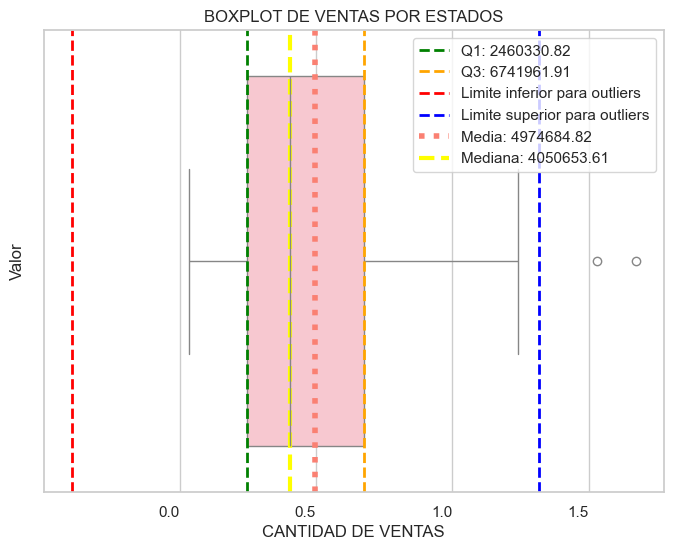

In [297]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_costos_ingresos, x='valor_ventas', color='pink')

# Agregar líneas para Q1 y Q3
plt.axvline(Q1, color='green', linestyle='dashed', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='orange', linestyle='dashed', linewidth=2, label=f'Q3: {Q3:.2f}')

# Agregar líneas para los límites inferior y superior de outliers
plt.axvline(lower_limit, color='red', linestyle='dashed', linewidth=2, label=f'Limite inferior para outliers')
plt.axvline(upper_limit, color='blue', linestyle='dashed', linewidth=2, label=f'Limite superior para outliers')

plt.axvline(media_estados, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_estados:.2f}')
plt.axvline(mediana_estados, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_estados:.2f}')

plt.title('Boxplot de Número de Ventas')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right',)
ax.set_xlabel('CANTIDAD DE VENTAS')
ax.set_ylabel('Valor')

ax.set_title('BOXPLOT DE VENTAS POR ESTADOS')
plt.legend()

plt.savefig('./utils/estados_ventas_boxplot.png')

plt.show()

> 3. HISTOGRAMA DE DISTRIBUCIÓN DE VENTAS POR ESTADOS

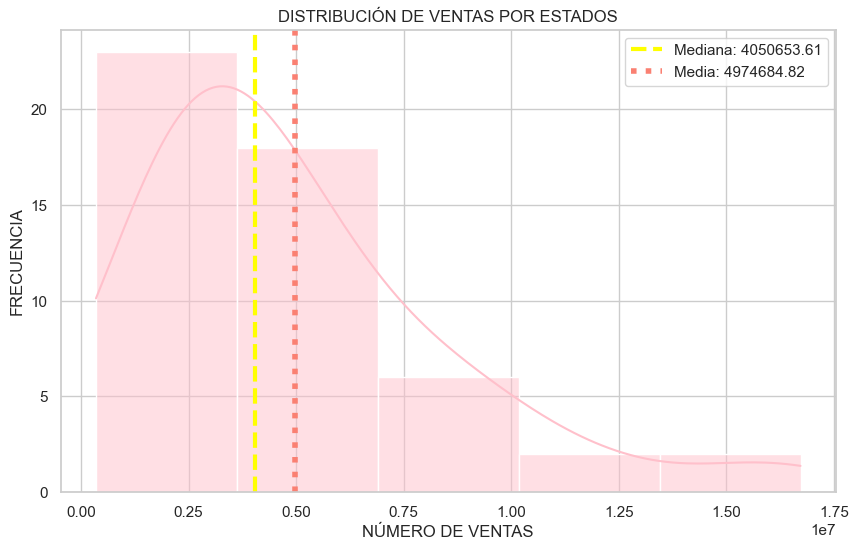

In [298]:
plt.figure(figsize=(10, 6))
sns.histplot(df_costos_ingresos['valor_ventas'], bins=5, kde=True, color='pink')

# Líneas verticales para la mediana y la media
plt.axvline(mediana_estados, color='yellow', linestyle='dashed', linewidth=3, label=f'Mediana: {mediana_estados:.2f}')
plt.axvline(media_estados, color='salmon', linestyle='dotted', linewidth=4, label=f'Media: {media_estados:.2f}')

# Título y etiquetas
plt.title('DISTRIBUCIÓN DE VENTAS POR ESTADOS')
plt.xlabel('NÚMERO DE VENTAS')
plt.ylabel('FRECUENCIA')

plt.legend()

plt.savefig('./utils/estados_ventas_histograma.png')

plt.show()

**CONCLUSIÓN**: Se oberva una **distribución asimétrica positiva** en las ventas por los distintos estados. <br>
Aunque la mayor cantidad de datos parecen estar concentrados, es decir, seguir una distribución normal, la cola hacia la derecha nos indica la presencia de outliers, por la gran cantidad de ingresos en ventas en los Estados de California y Texas.

4. Mapa de los Estados Unidos, donde se pueda observar aquellos estados en los que hubo una mayor concentración de ingresos a la empresa por ventas. 

In [227]:
mapa_estados = gpd.read_file('./data/1.raw/archivos_mapa/cb_2021_us_state_20m.shp')

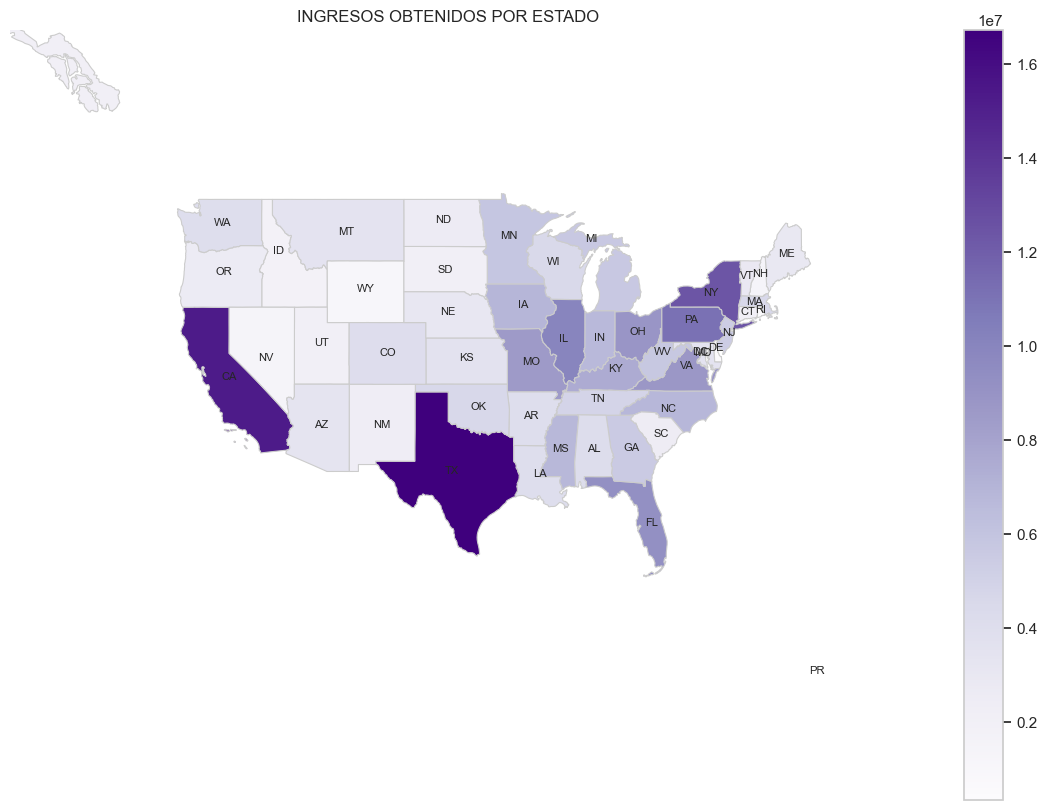

In [299]:
mapa_y_ventas_por_estado = mapa_estados.merge(df_costos_ingresos, how='left', left_on='STUSPS', right_on='estado')

# Crea un GeoDataFrame separado para las iniciales de los estados
iniciales_estados = mapa_y_ventas_por_estado.apply(lambda row: row['STUSPS'][:2], axis=1)
geometry_puntos = mapa_y_ventas_por_estado.geometry.representative_point()
estados_iniciales_gdf = gpd.GeoDataFrame({'estado': mapa_y_ventas_por_estado['STUSPS'], 'Iniciales': iniciales_estados},
                                          geometry=geometry_puntos)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
mapa_y_ventas_por_estado.plot(column='valor_ventas', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
estados_iniciales_gdf.apply(lambda x: ax.annotate(text=x['Iniciales'], xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)

ax.set_title('INGRESOS OBTENIDOS POR ESTADO')
ax.set_axis_off()

ax.set_xlim([-140, -60])
ax.set_ylim([10, 60])

plt.savefig('./utils/estados_ventas_MAPA.png')

plt.show()

#### 8.4.3. ANÁLISIS DE VENTAS RELACIONADO CON LOS INGRESOS PROMEDIOS FAMILIARES

> 1. Seguidamente haré un gráfico `regplot` para visualizar la relación entre los valores de las ventas y los ingresos de los estados. 

El objetivo es observar si los mayores ingresos por ventas en un estado, se relaciona con el poder adquisitivo de los consumidores pertenecientes a los mismos. 

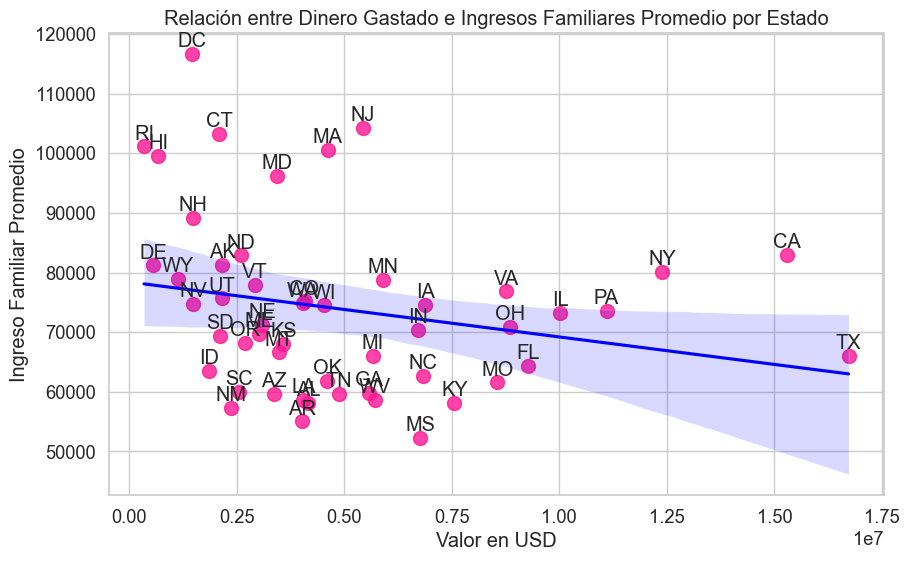

In [300]:
sns.set(style="whitegrid", font_scale=1.2)

# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='valor_ventas', y='ingreso_familiar_promedio', data=df_costos_ingresos, color='#FF1493', scatter_kws={'s': 100}, line_kws={'color': 'blue'})

# Añadir etiquetas y título
plt.title('Relación entre Dinero Gastado e Ingresos Familiares Promedio por Estado')
plt.xlabel('Valor en USD')
plt.ylabel('Ingreso Familiar Promedio')

# Añadir etiquetas de estado
for i, estado in enumerate(df_costos_ingresos['estado']):
    plt.annotate(estado, (df_costos_ingresos['valor_ventas'].iloc[i], df_costos_ingresos['ingreso_familiar_promedio'].iloc[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center')

# Mostrar el gráfico
plt.grid(True)

plt.savefig('./utils/estados_ventas_ingresos_regplot.png')

plt.show()

**CONCLUSIÓN**: Se puede observar una **relación negativa** entre las dos variables, es decir no existe relación entre las ventas producidas en cada Estado y el poder adquisitivo promedio del mismo. <br>
Las mayores ventas acaecidas desde los Estados que no tienen la mayor cantidad de ingresos, podría deberse a la falta de desarrollo comercial por ejemplo en los mismos, o personas que viven alejadas de los centros urbanos y a muchos factores más. 

> CORRELACIÓN ENTRE VARIABLES DE VALOR VENTAS E INGRESOS PROMEDIOS POR ESTADOS

In [256]:
correlacion = df_costos_ingresos['ingreso_familiar_promedio'].corr(df_costos_ingresos['valor_ventas'])

print(f"Coeficiente de correlación: {correlacion}")

Coeficiente de correlación: -0.22745998331884396


**CONCLUSIÓN**: Dado el resultado de Coeficiente de correlación entre las variables, confirmamos lo descripto respecto al 'regplot', es decir, una **correlación negativa débil** entre las dos variables. <br>
Por lo tanto, no puede confirmarse que la mayor cantidad de ingresos a la empresa proviene de los estados donde los ingresos promedios por familia son más altos, es decir, aquellos donde el poder adquisitivo es mayor. 

#### 8.4.4. CORRELACIÓN DE PEARSON - PRUEBA HIPÓTESIS 

- **Hipótesis nula (H0)**: No hay correlación lineal significativa entre las dos variables.
- **Hipótesis alternativa (Ha)**: Existe una correlación lineal significativa entre las dos variables.

In [263]:
from scipy.stats import pearsonr

ingreso_familiar_promedio = df_costos_ingresos['ingreso_familiar_promedio']
valor_ventas = df_costos_ingresos['valor_ventas']

# Calcular la correlación de Pearson y el valor p
correlacion, valor_p = pearsonr(ingreso_familiar_promedio, valor_ventas)

# Imprimir resultados
print(f'Coeficiente de correlación de Pearson: {correlacion}')
print(f'Valor p: {valor_p}')

# Interpretar los resultados
if valor_p < 0.05: 
    print('Rechazamos la hipótesis nula. Hay evidencia significativa de una correlación entre ingresos y sueldos.')
else:
    print('No hay evidencia significativa para rechazar la hipótesis nula.')

Coeficiente de correlación de Pearson: -0.22745998331884412
Valor p: 0.10844122014363626
No hay evidencia significativa para rechazar la hipótesis nula.
